In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colab File Upload

In [2]:
!git clone https://github.com/galav12/CSC442-Project.git

Cloning into 'CSC442-Project'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 50 (delta 19), reused 16 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 28.98 MiB | 11.09 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [3]:
%cd CSC442-Project/
!ls

/content/CSC442-Project
'CSC442 Dataset Report (1).pdf'   data	 dataset_cleaner.ipynb	 README.md   teamnotes


## Cleaning Pollution Dataset

In [4]:
pollution_full = pd.read_csv("data/Pollution.zip", compression="zip")
pollution_full.shape

(1746661, 29)

In [5]:
pollution = pollution_full[(pollution_full["Date Local"].str[:4] <=  "2015") & (pollution_full["Date Local"].str[:4] >=  "2011") & (pollution_full["State"] != "District Of Columbia")]
pollution = pollution[["State","Date Local","NO2 Mean","NO2 1st Max Value","NO2 AQI","O3 Mean","O3 1st Max Value","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 AQI","CO Mean","CO 1st Max Value","CO AQI"]]
pollution["Year"] = pollution["Date Local"].str[:4]
pollution['Year'] = pollution['Year'].astype(int)
pollution = pollution.drop(columns=["Date Local"])
print(pollution.shape)

(640025, 14)


In [6]:
pollution["NO2 AQI"] = pollution["NO2 AQI"].astype(np.float64)
pollution["O3 AQI"] = pollution["O3 AQI"].astype(np.float64)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640025 entries, 1072382 to 1722056
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              640025 non-null  object 
 1   NO2 Mean           640025 non-null  float64
 2   NO2 1st Max Value  640025 non-null  float64
 3   NO2 AQI            640025 non-null  float64
 4   O3 Mean            640025 non-null  float64
 5   O3 1st Max Value   640025 non-null  float64
 6   O3 AQI             640025 non-null  float64
 7   SO2 Mean           640025 non-null  float64
 8   SO2 1st Max Value  640025 non-null  float64
 9   SO2 AQI            320210 non-null  float64
 10  CO Mean            640025 non-null  float64
 11  CO 1st Max Value   640025 non-null  float64
 12  CO AQI             319955 non-null  float64
 13  Year               640025 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 73.2+ MB


In [7]:
# Aggregating pollution by state and year
pollution_no_outliers = pollution.copy()
for col in pollution_no_outliers.columns[1:]:
        pollution_no_outliers = pollution_no_outliers[(pollution_no_outliers[col] >= pollution_no_outliers[col].quantile(0.05)) & (pollution_no_outliers[col] <= pollution_no_outliers[col].quantile(0.95))]

pollution_state = pollution_no_outliers.groupby(["State","Year"]).aggregate('mean').reset_index()
pollution_state.shape

(188, 14)

In [8]:
# pollution_state.to_csv("data/pollution_clean.csv",index=False)

## Cleaning Heart Disease Dataset

In [9]:
heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")
heart_full.shape

<ipython-input-9-1f9cd1d613a9>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")


(85800, 29)

In [10]:
heart = heart_full[["Year","LocationDesc","Category","Topic","Data_Value_Type","Data_Value","Break_Out_Category","Break_out"]]
heart = heart.pivot_table(index=["Year", "LocationDesc", "Category", "Topic", "Break_Out_Category", "Break_out"], columns="Data_Value_Type", values="Data_Value").reset_index()
heart = heart.drop(columns=["Age-Standardized"])
heart = heart.pivot_table(index=["Year","LocationDesc","Category","Topic"], columns=["Break_Out_Category", "Break_out"], values="Crude").reset_index()

heart.columns = (col[0]+'_'+col[1] if col[1] != '' else col[0] for col in heart.columns)

heart.shape

(2556, 19)

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2556 non-null   int64  
 1   LocationDesc             2556 non-null   object 
 2   Category                 2556 non-null   object 
 3   Topic                    2556 non-null   object 
 4   Age_18-24                846 non-null    float64
 5   Age_20-24                322 non-null    float64
 6   Age_25-44                2114 non-null   float64
 7   Age_35+                  2556 non-null   float64
 8   Age_45-64                2556 non-null   float64
 9   Age_65+                  2556 non-null   float64
 10  Age_75+                  2551 non-null   float64
 11  Gender_Female            2556 non-null   float64
 12  Gender_Male              2556 non-null   float64
 13  Overall_Overall          2556 non-null   float64
 14  Race_Hispanic           

In [12]:
# heart.to_csv("data/heart_clean.csv",index=False)

## Merging Dataset

In [13]:
merged = pd.merge(heart, pollution_state, left_on=["LocationDesc","Year"], right_on=["State","Year"], how="left")

In [14]:
merged = merged[merged["State"].notna()]
merged = merged.drop(columns=["State"])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1841 entries, 22 to 2555
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1841 non-null   int64  
 1   LocationDesc             1841 non-null   object 
 2   Category                 1841 non-null   object 
 3   Topic                    1841 non-null   object 
 4   Age_18-24                595 non-null    float64
 5   Age_20-24                237 non-null    float64
 6   Age_25-44                1525 non-null   float64
 7   Age_35+                  1841 non-null   float64
 8   Age_45-64                1841 non-null   float64
 9   Age_65+                  1841 non-null   float64
 10  Age_75+                  1837 non-null   float64
 11  Gender_Female            1841 non-null   float64
 12  Gender_Male              1841 non-null   float64
 13  Overall_Overall          1841 non-null   float64
 14  Race_Hispanic            130

In [15]:
# merged.to_csv("data/merged.csv",index=False)

## Outliers

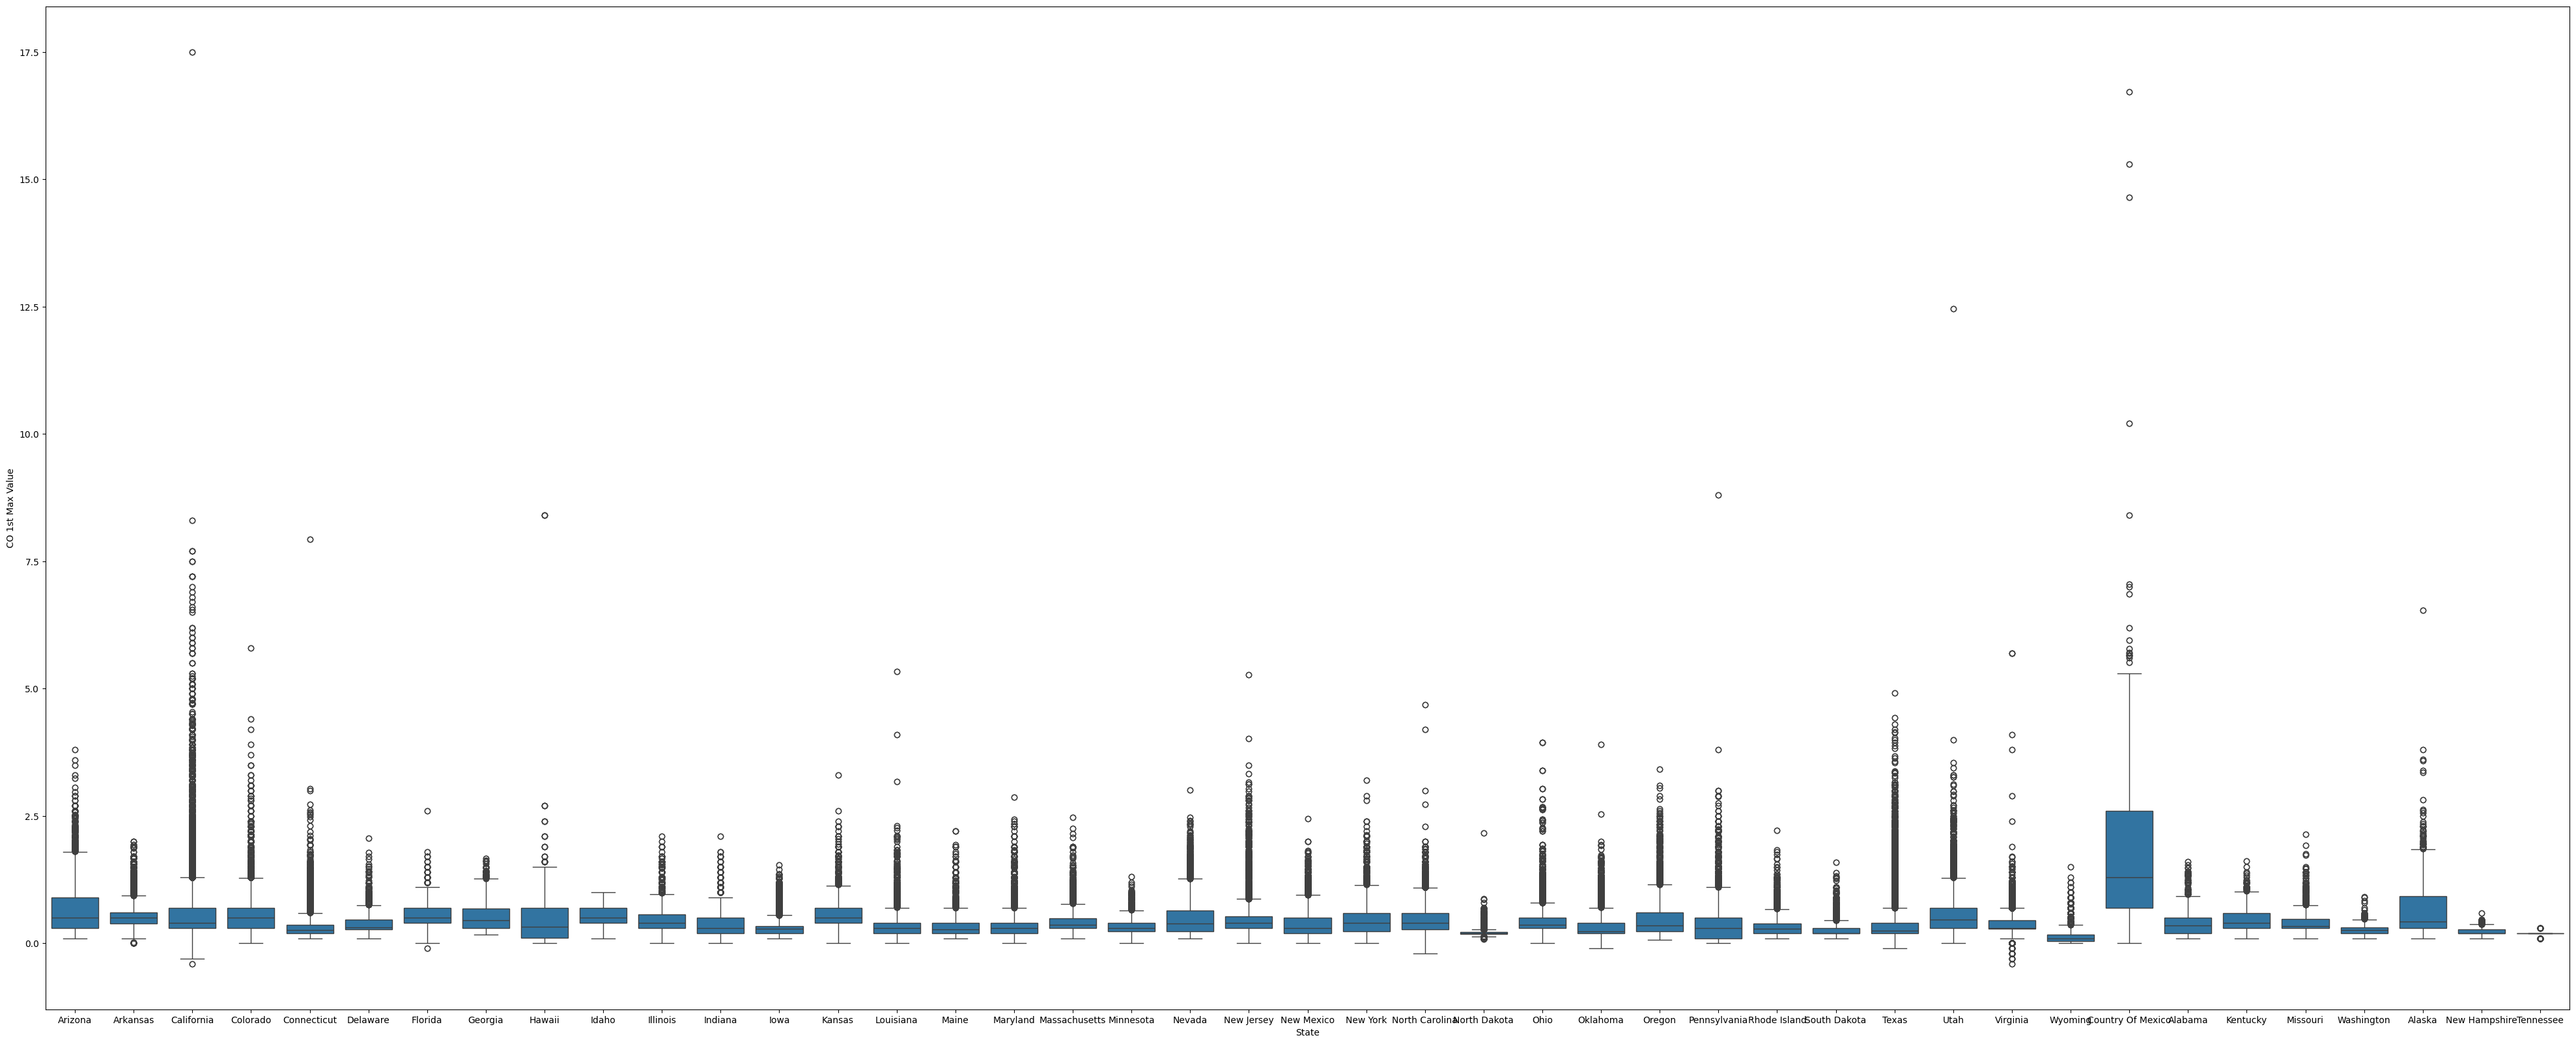

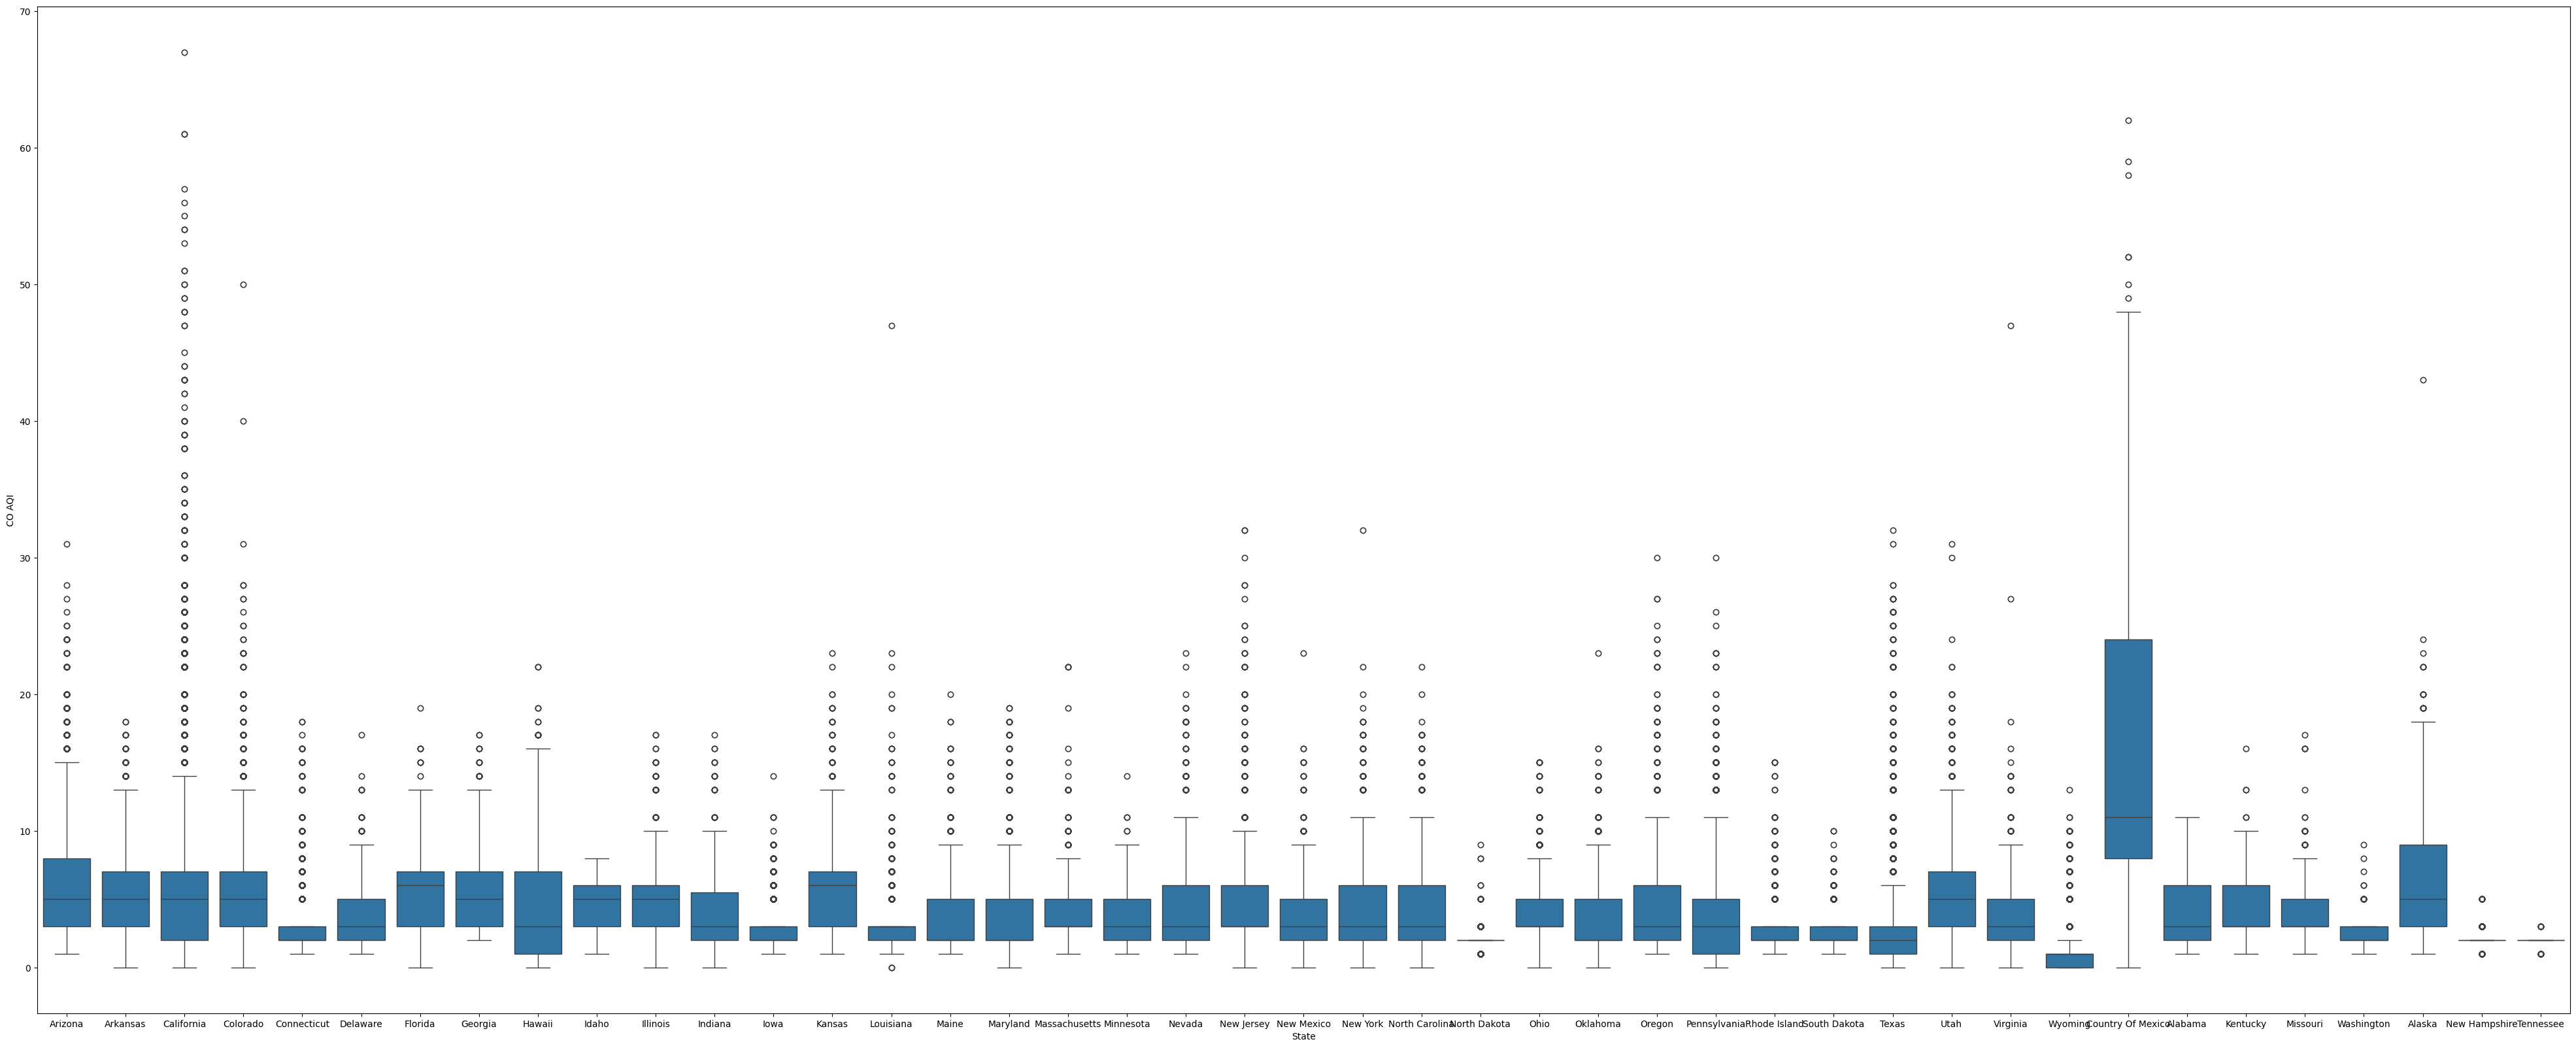

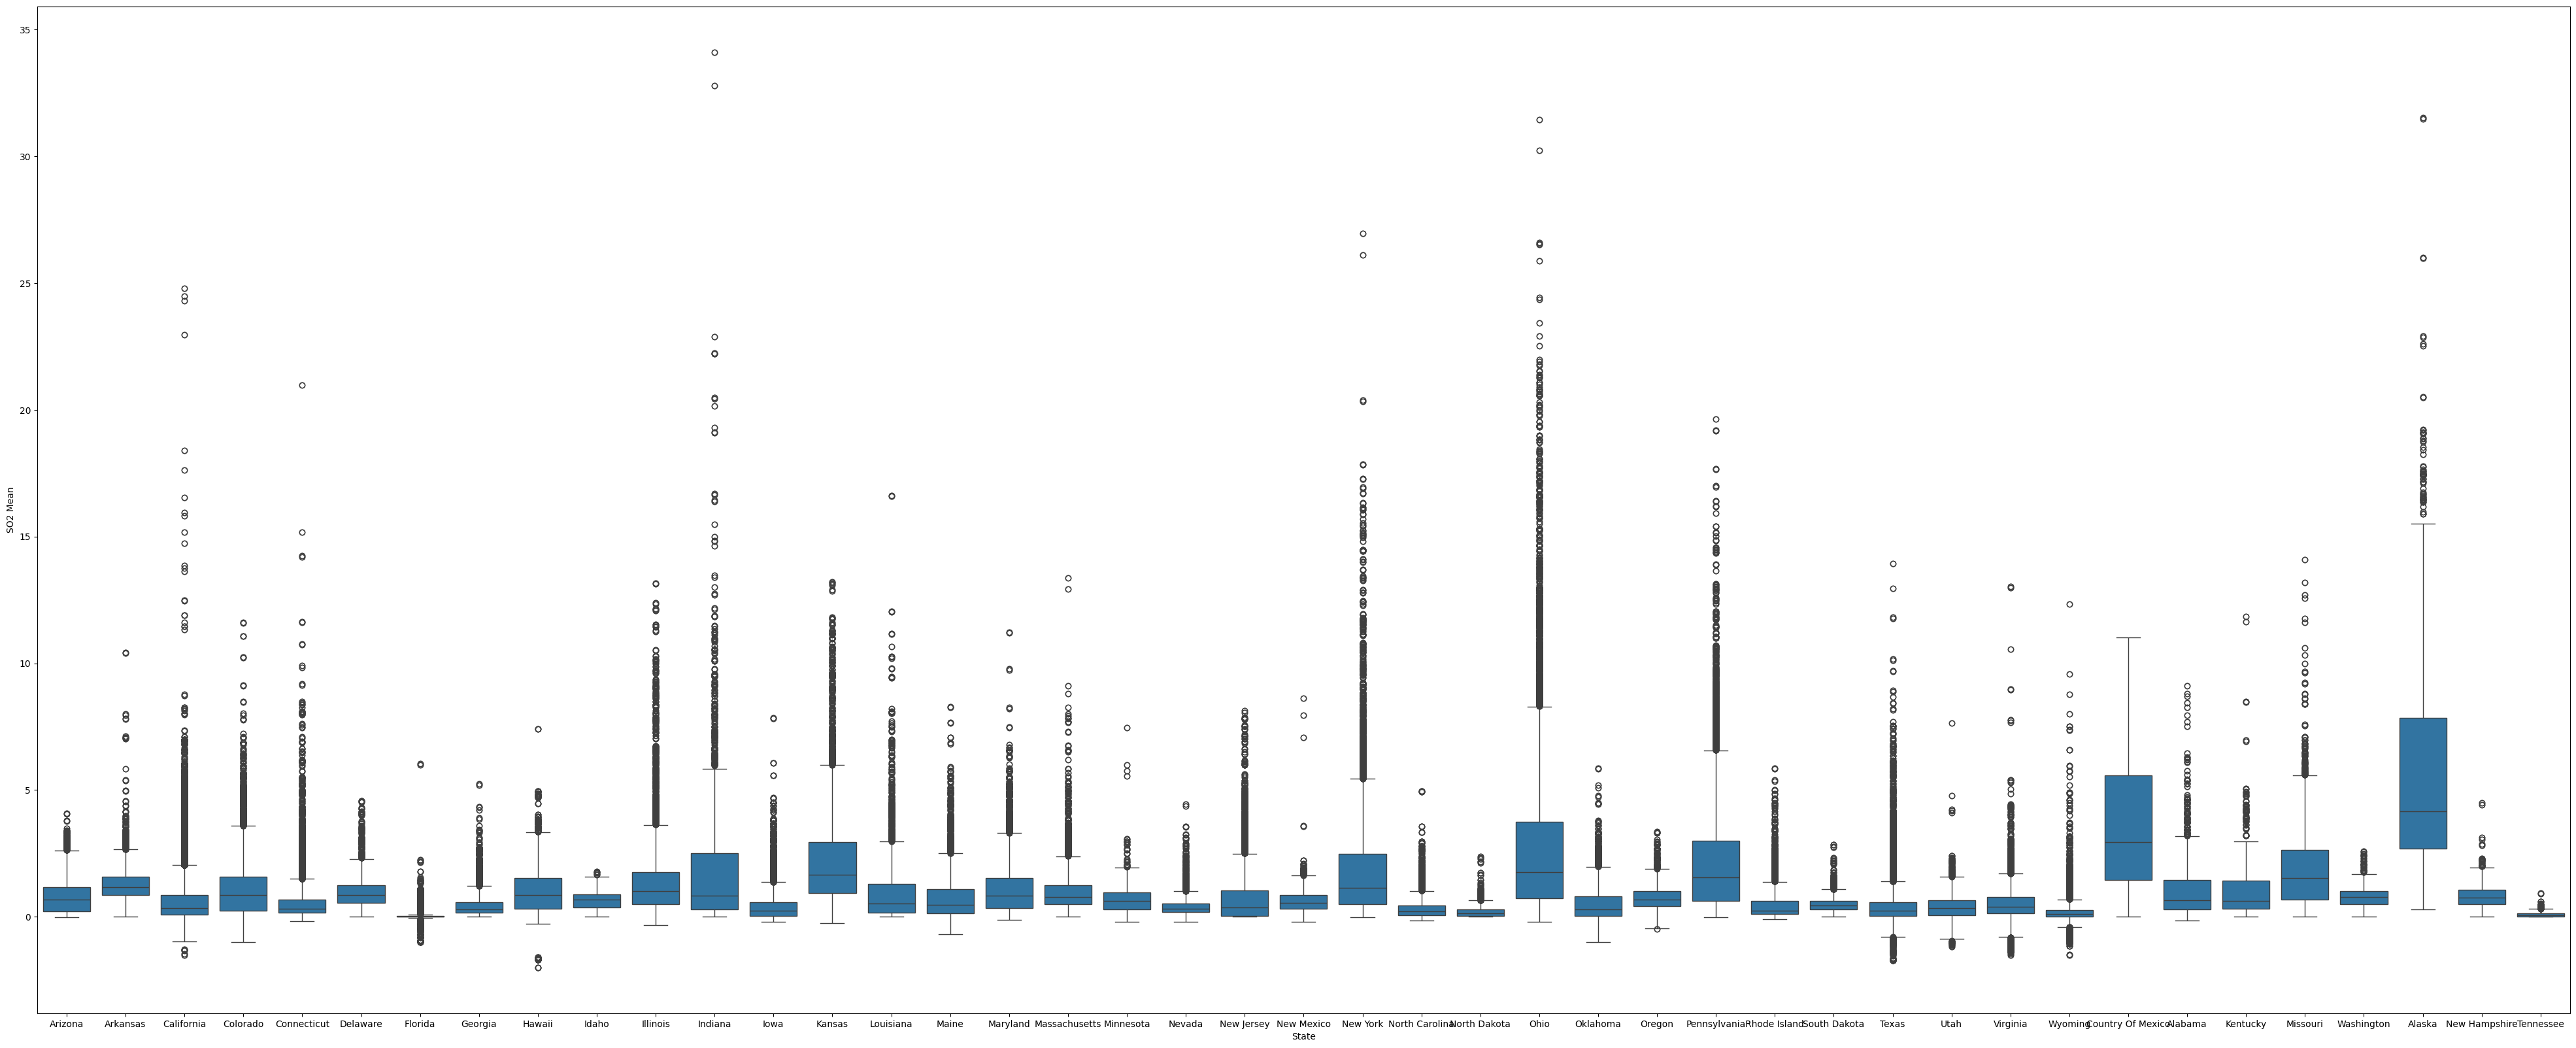

In [16]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['SO2 Mean'])
plt.show()

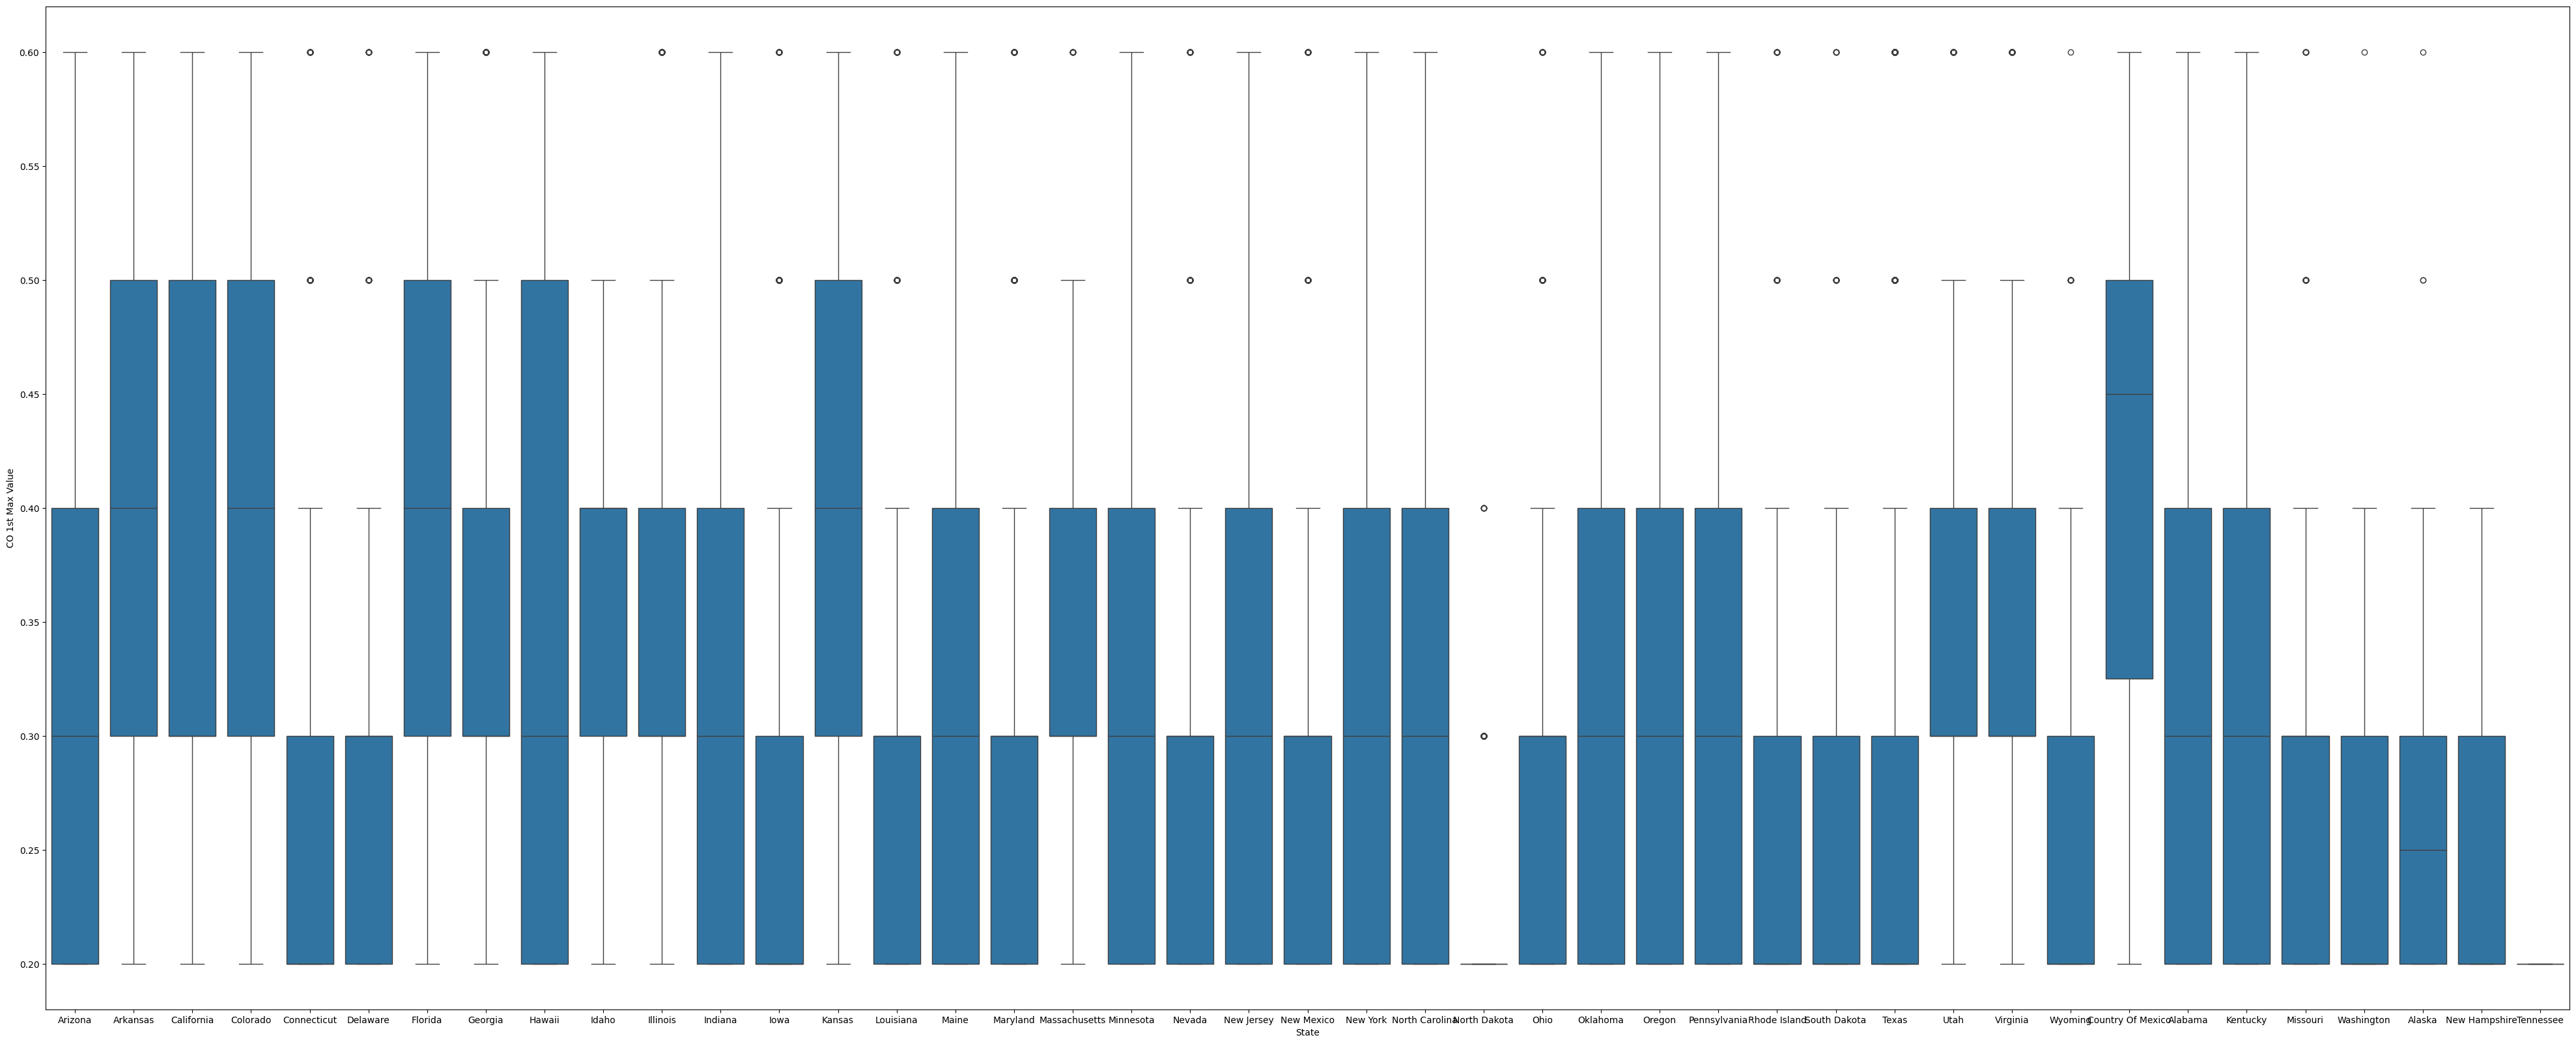

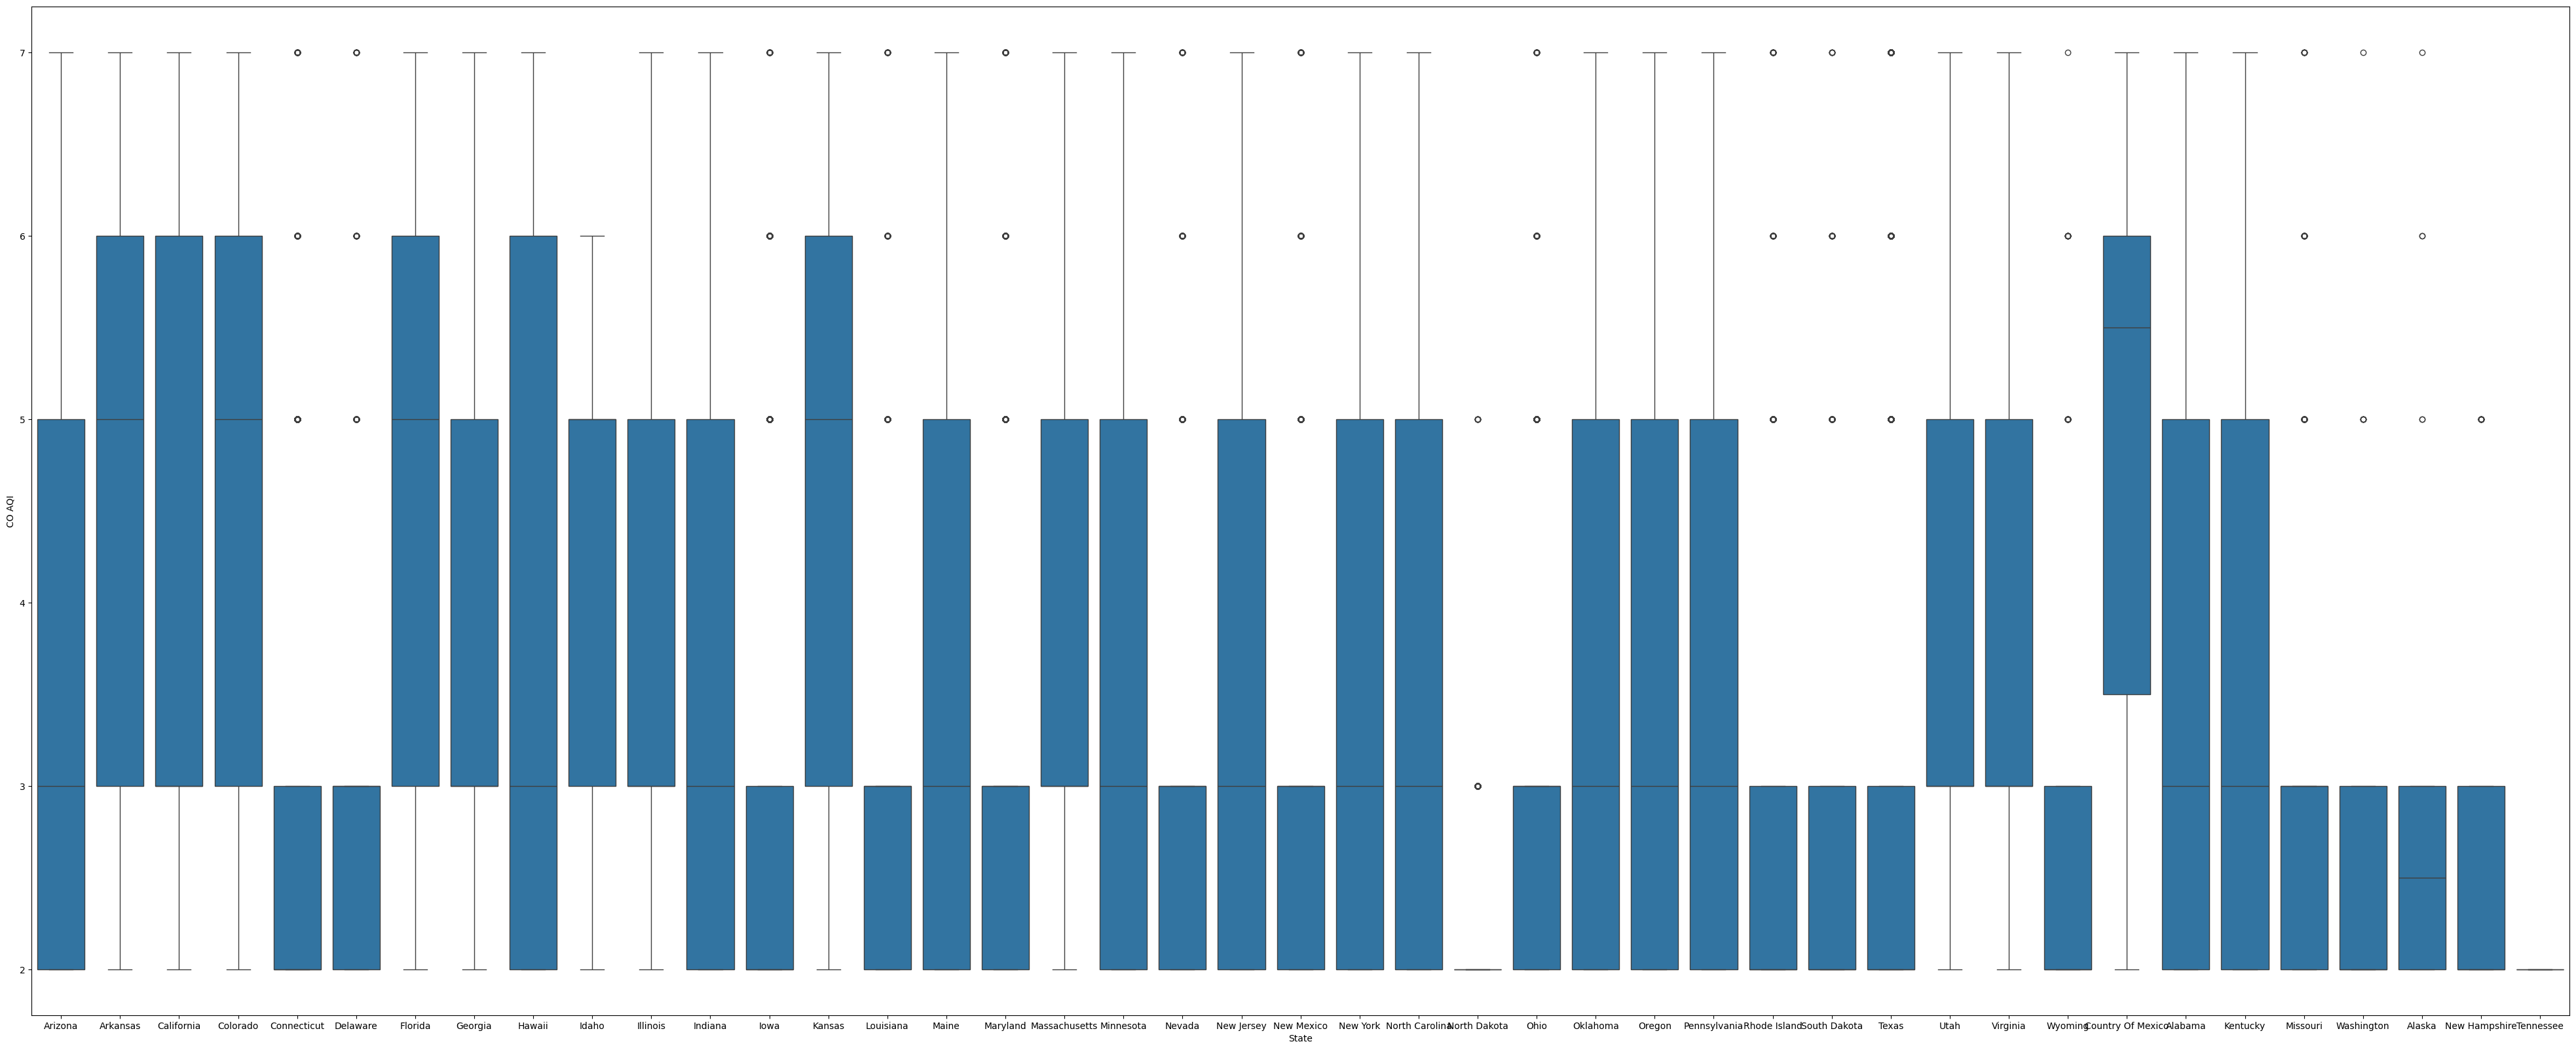

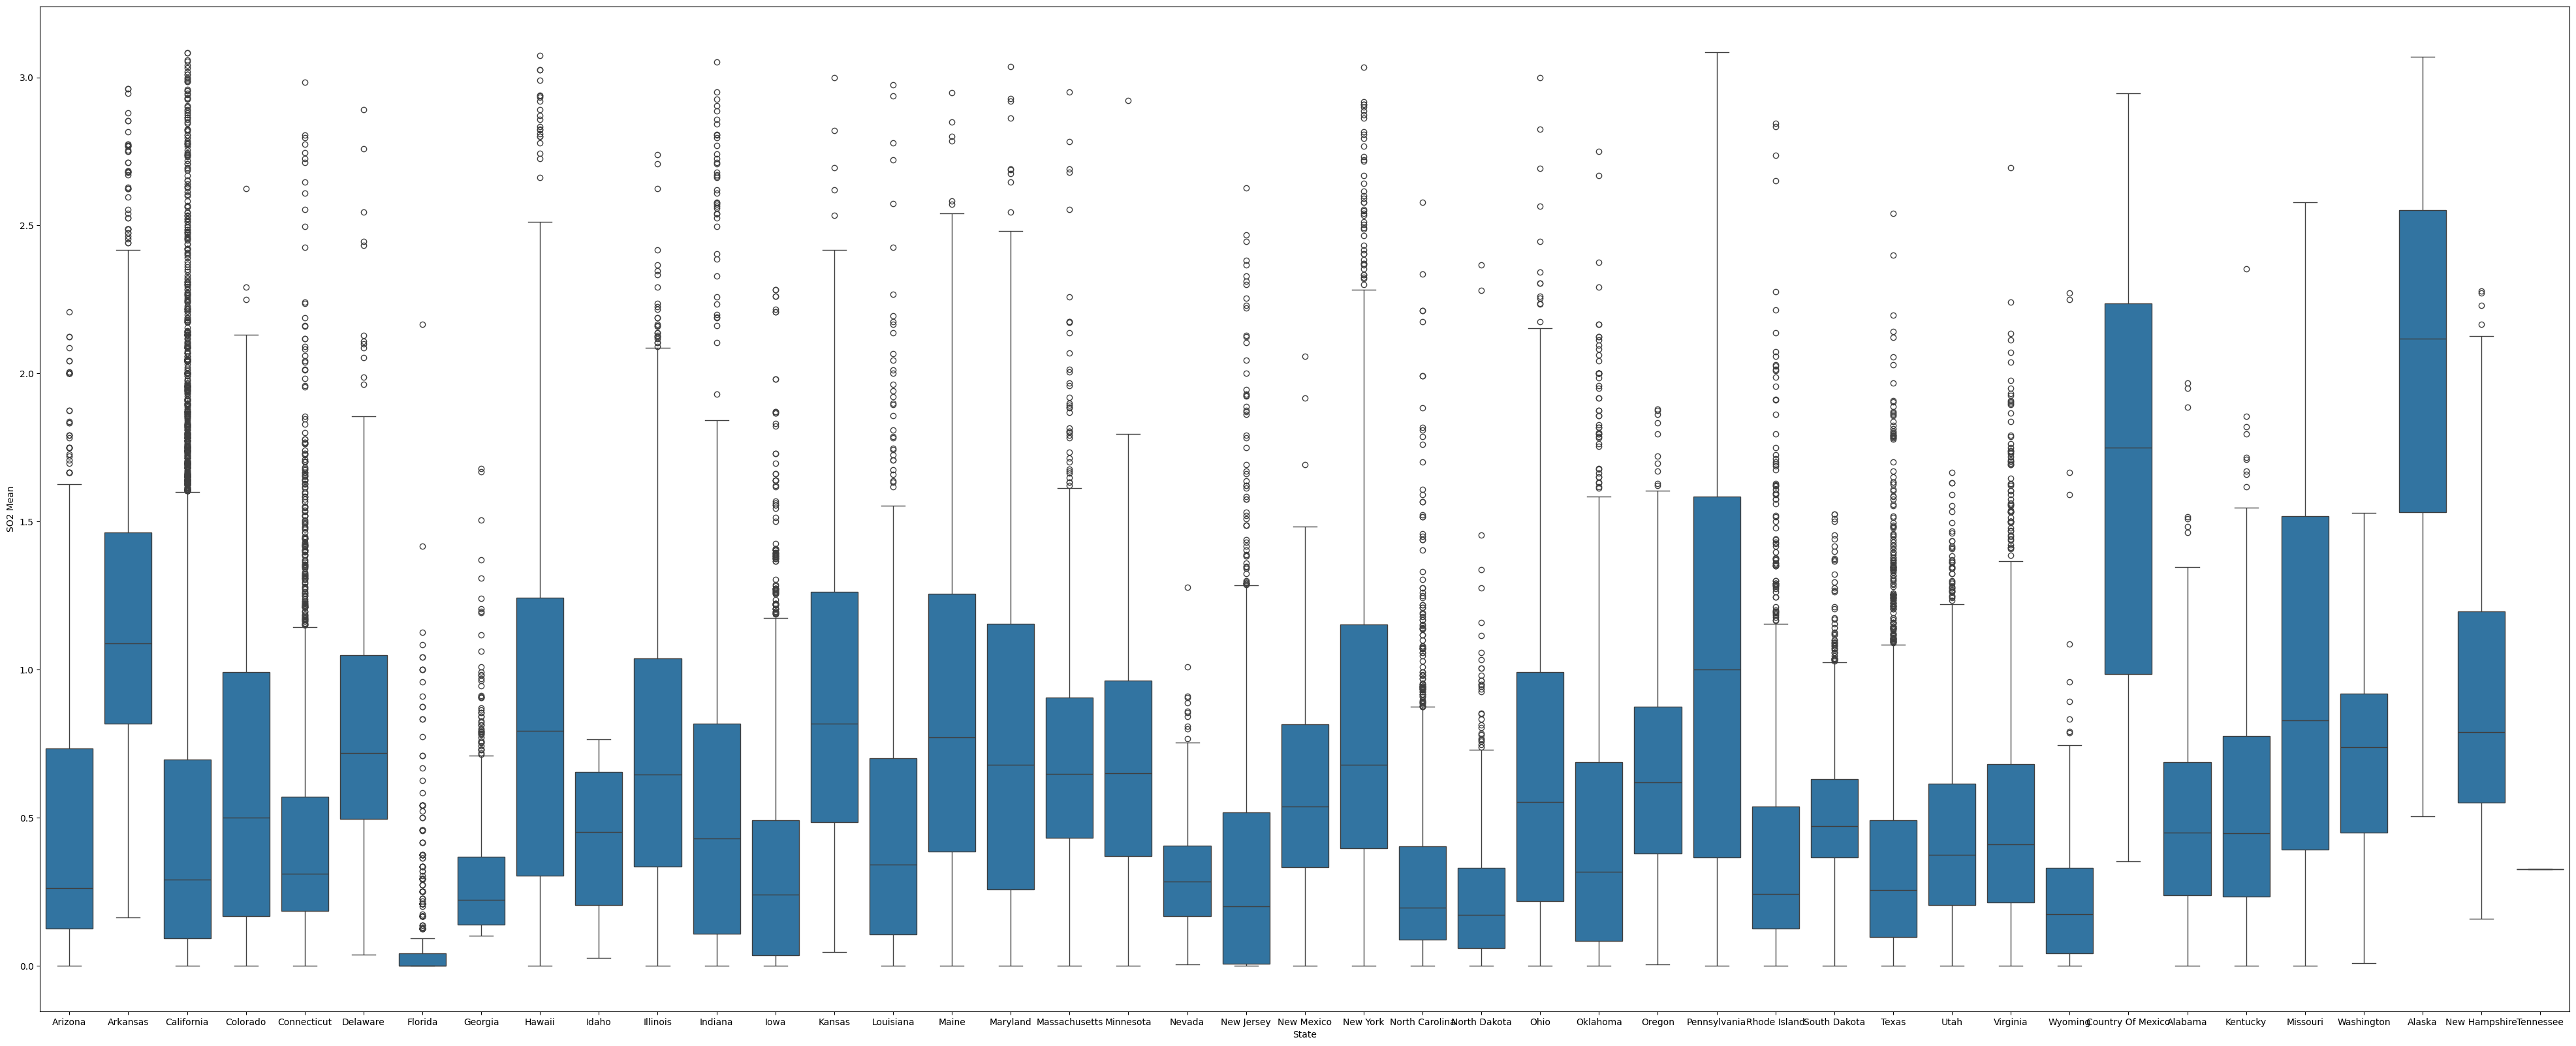

In [17]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['SO2 Mean'])
plt.show()

## EDA

In [18]:
merged.describe()

,Year,Age_18-24,Age_20-24,Age_25-44,Age_35+,Age_45-64,Age_65+,Age_75+,Gender_Female,Gender_Male,...,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value,CO AQI
count,1841.000000,595.000000,237.000000,1525.000000,1841.000000,1841.000000,1841.000000,1837.000000,1841.000000,1841.000000,...,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,2013.094514,50.696891,30.591139,30.223082,29.997067,29.651276,33.474552,32.995237,28.157116,29.380147,...,18.351205,0.026948,0.037887,33.670282,0.585771,1.427783,1.386746,0.236518,0.312453,3.433925
std,1.460635,35.070729,10.147617,29.823236,28.284387,28.660377,27.638753,26.119820,28.578956,29.000611,...,3.958563,0.003081,0.003393,2.972376,0.328144,0.567112,0.805643,0.048744,0.051964,0.702697
min,2011.000000,1.100000,4.900000,0.300000,2.400000,1.500000,4.200000,1.000000,1.600000,1.500000,...,7.000000,0.014166,0.023438,21.437500,0.022730,0.283019,0.000000,0.131982,0.200000,2.000000
25%,2012.000000,16.100000,32.350000,2.400000,6.800000,5.600000,11.400000,13.400000,4.000000,6.100000,...,15.488294,0.025398,0.035897,32.151316,0.334774,1.010096,0.732394,0.205212,0.279618,2.987261
50%,2013.000000,76.600000,34.100000,25.400000,15.000000,15.500000,21.900000,23.700000,11.700000,14.100000,...,18.273292,0.026975,0.038017,33.661290,0.521170,1.394595,1.255435,0.233333,0.310663,3.410959
75%,2014.000000,84.650000,35.400000,56.900000,63.000000,61.150000,65.700000,56.600000,57.550000,54.100000,...,20.982143,0.028721,0.039890,35.461153,0.790987,1.838217,2.054852,0.261664,0.342424,3.809365
max,2015.000000,93.000000,62.500000,91.200000,92.800000,92.000000,92.600000,93.700000,91.100000,93.800000,...,27.654206,0.041500,0.044716,41.000000,2.376164,3.793750,4.750000,0.409548,0.519608,6.117647


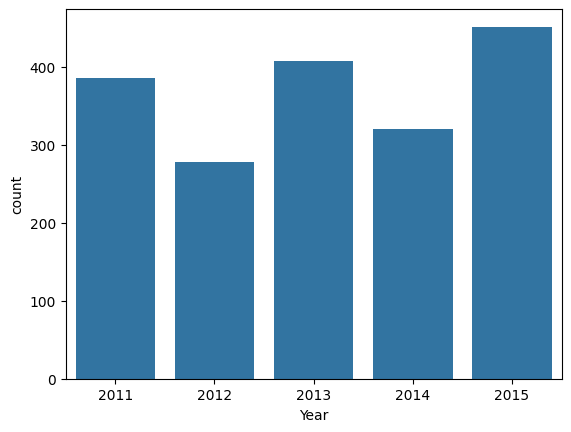

In [19]:
sns.countplot(x="Year", data = merged)
plt.show()

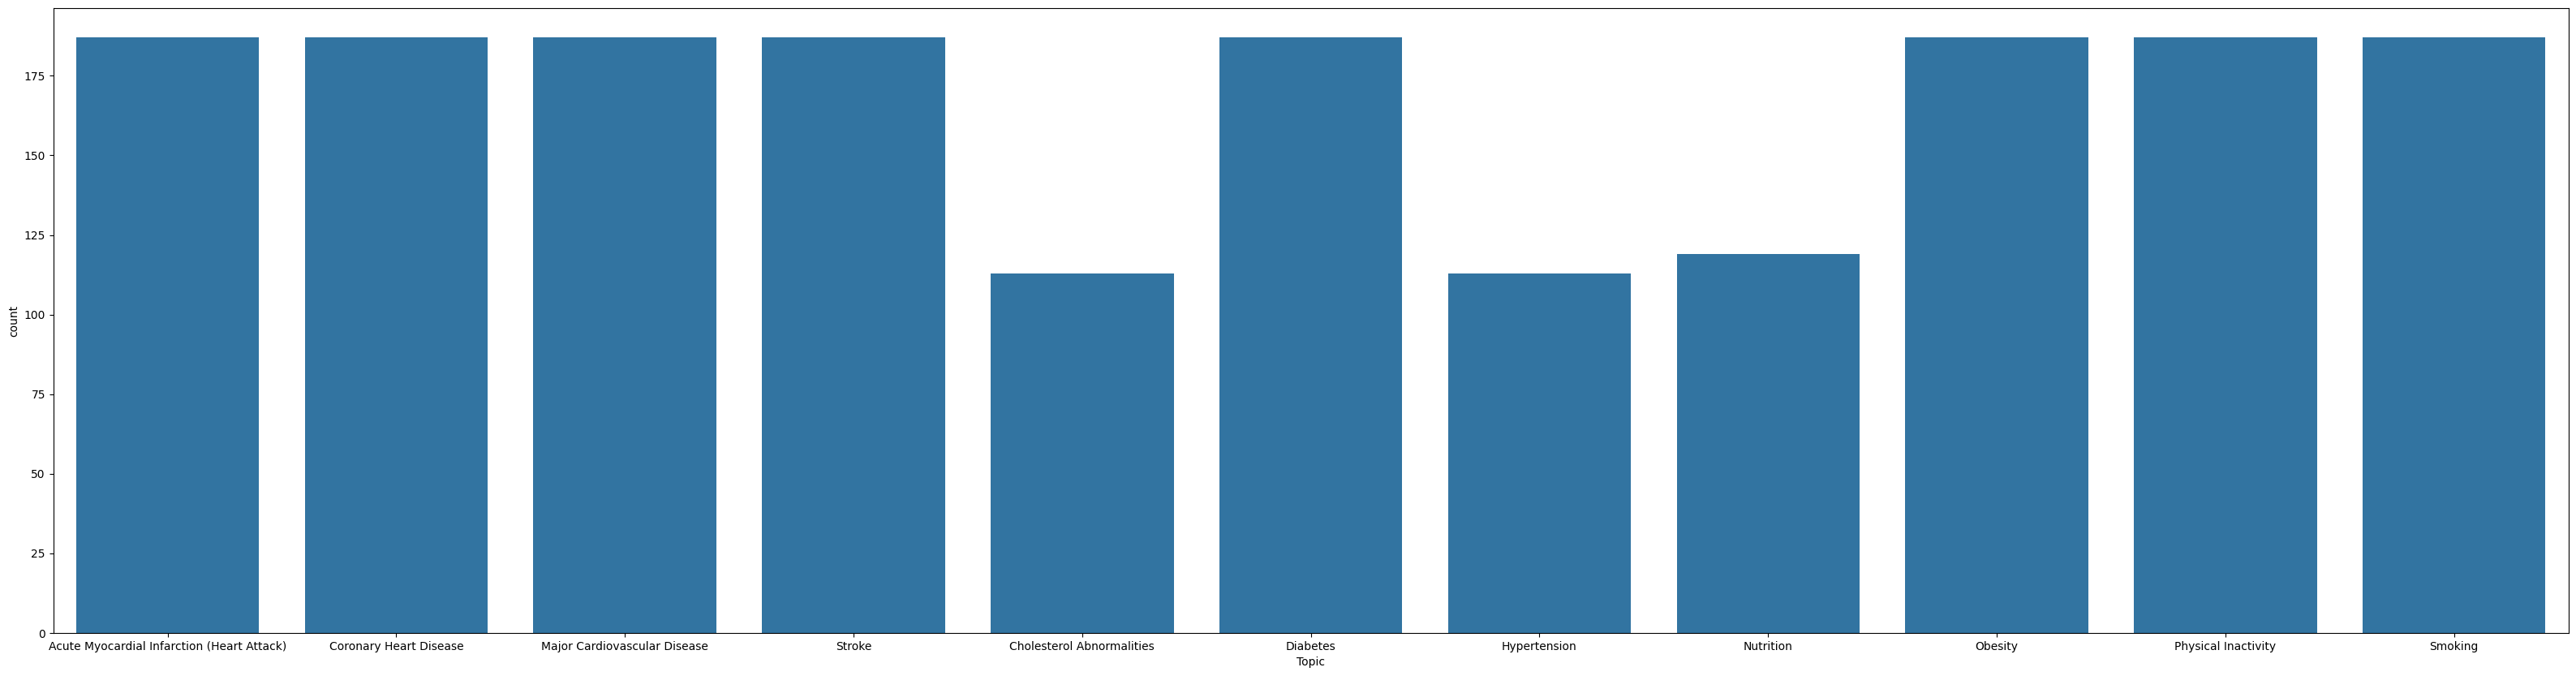

In [20]:
plt.figure(figsize=(40,10))
sns.countplot(x="Topic", data = merged)
plt.show()

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Age_18-24'}>,
        <Axes: title={'center': 'Age_20-24'}>,
        <Axes: title={'center': 'Age_25-44'}>,
        <Axes: title={'center': 'Age_35+'}>],
       [<Axes: title={'center': 'Age_45-64'}>,
        <Axes: title={'center': 'Age_65+'}>,
        <Axes: title={'center': 'Age_75+'}>,
        <Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Gender_Male'}>],
       [<Axes: title={'center': 'Overall_Overall'}>,
        <Axes: title={'center': 'Race_Hispanic'}>,
        <Axes: title={'center': 'Race_Non-Hispanic Asian'}>,
        <Axes: title={'center': 'Race_Non-Hispanic Black'}>,
        <Axes: title={'center': 'Race_Non-Hispanic White'}>],
       [<Axes: title={'center': 'Race_Other'}>,
        <Axes: title={'center': 'NO2 Mean'}>,
        <Axes: title={'center': 'NO2 1st Max Value'}>,
        <Axes: title={'center': 'NO2 AQI'}>,
        <Axes: title={'center': 'O3 Mean'}>],
     

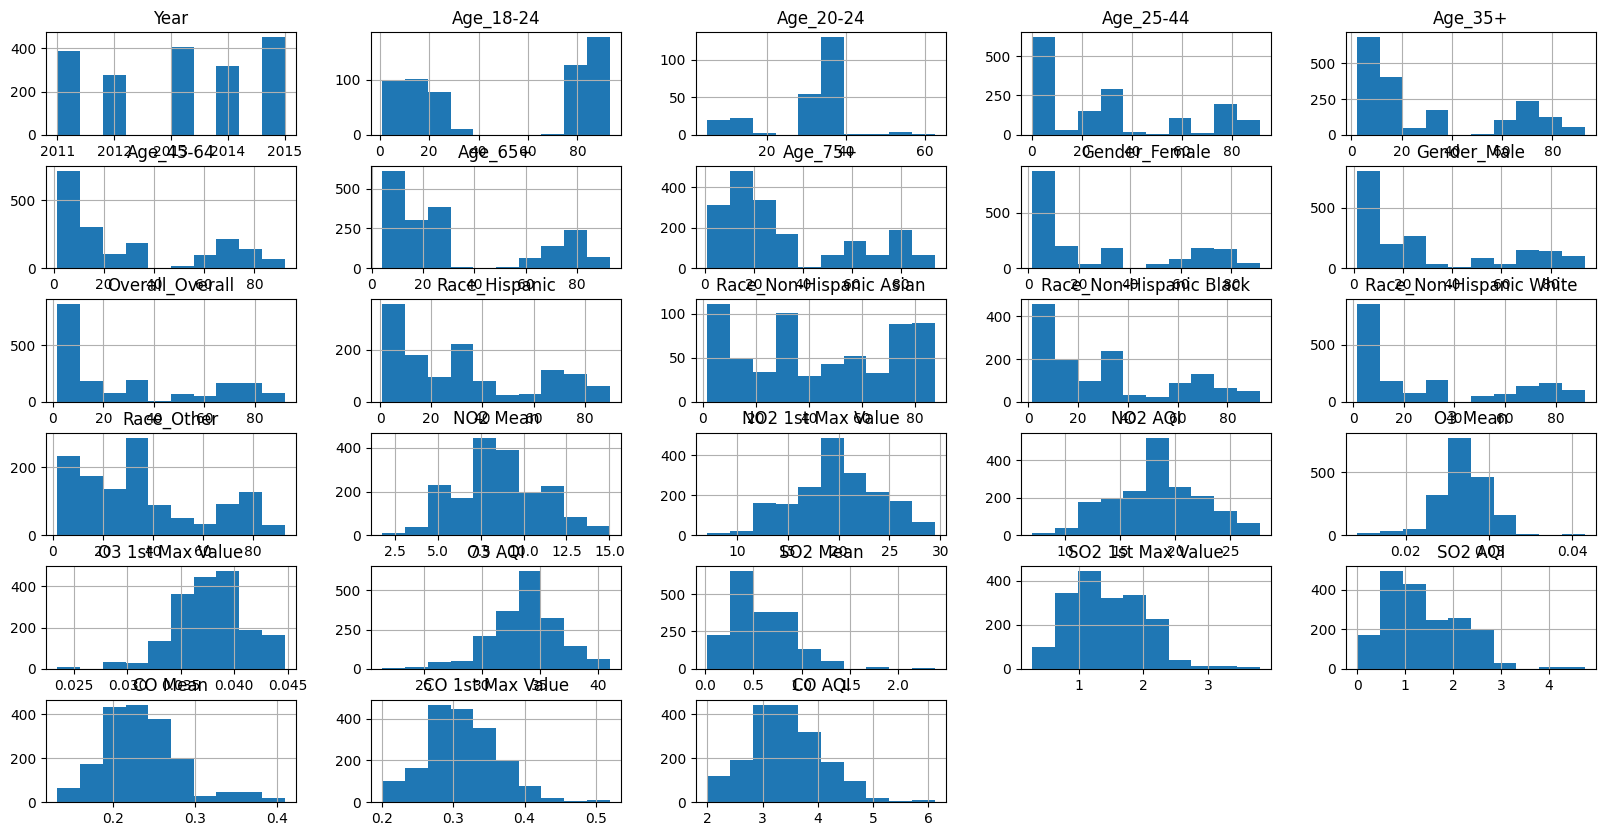

In [21]:
merged.hist(figsize=(20,10))

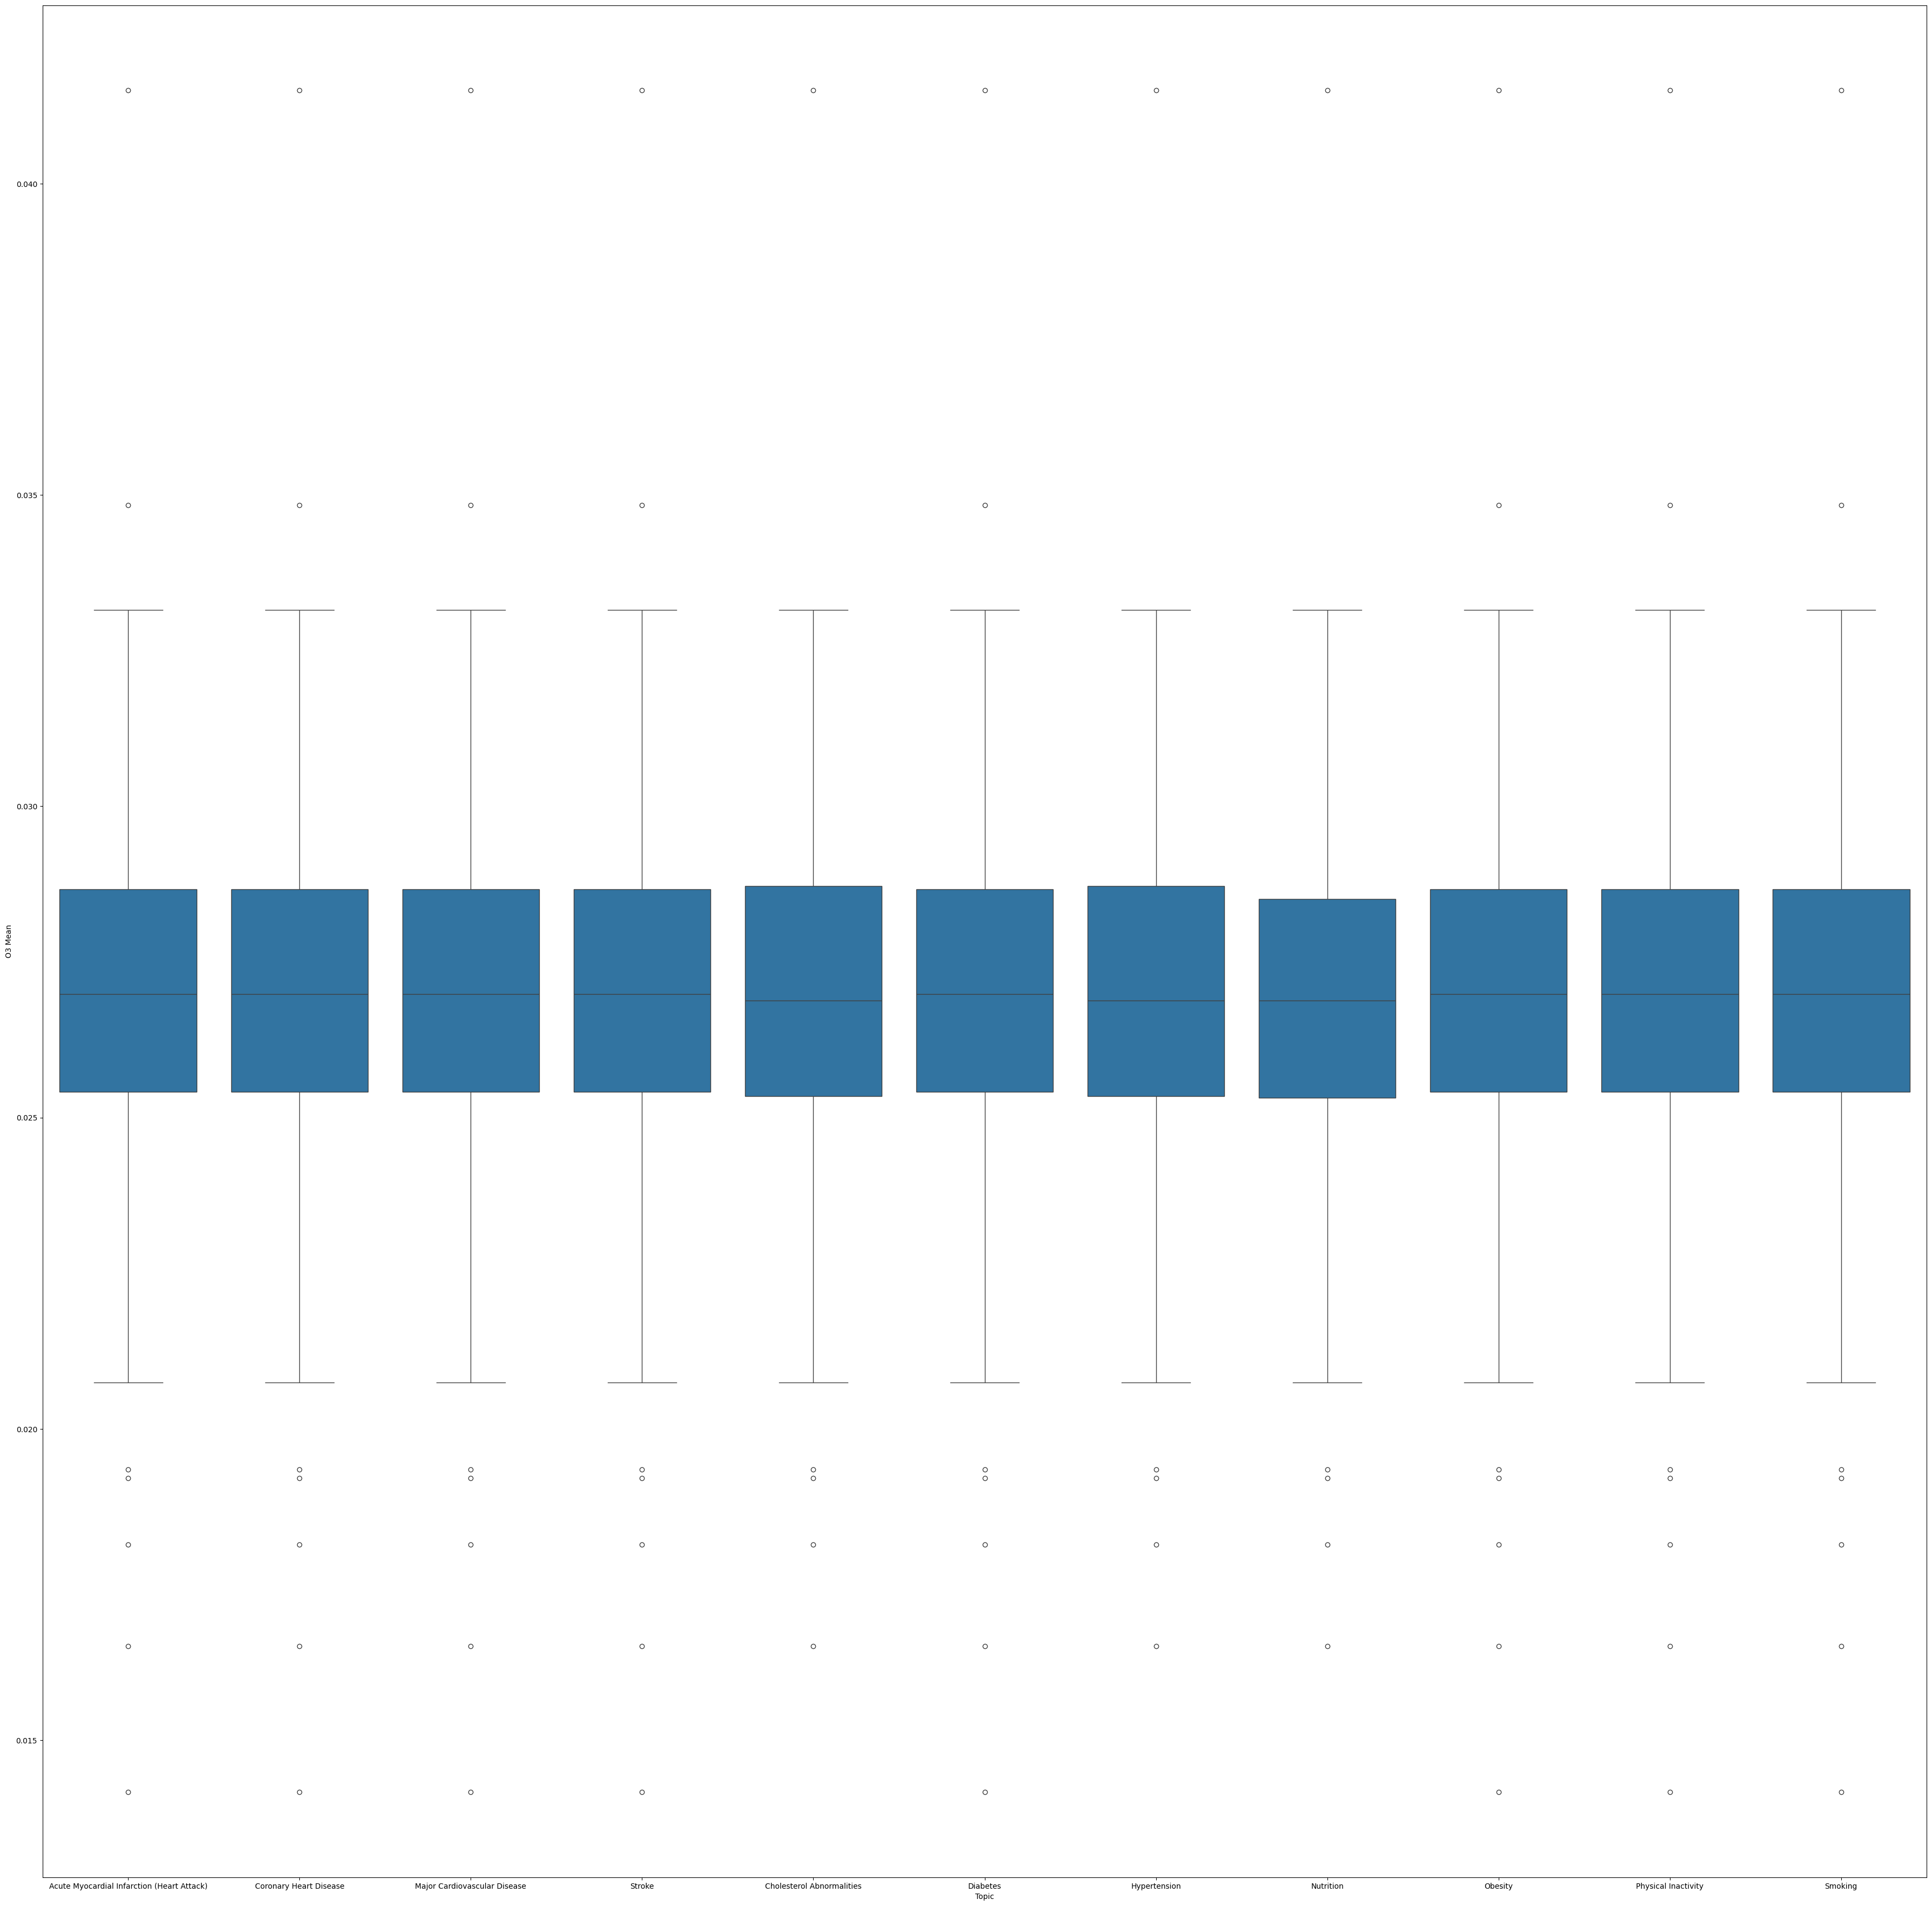

In [22]:
plt.figure(figsize= (45,45))
sns.boxplot(x="Topic", y = "O3 Mean", data = merged)
plt.show()

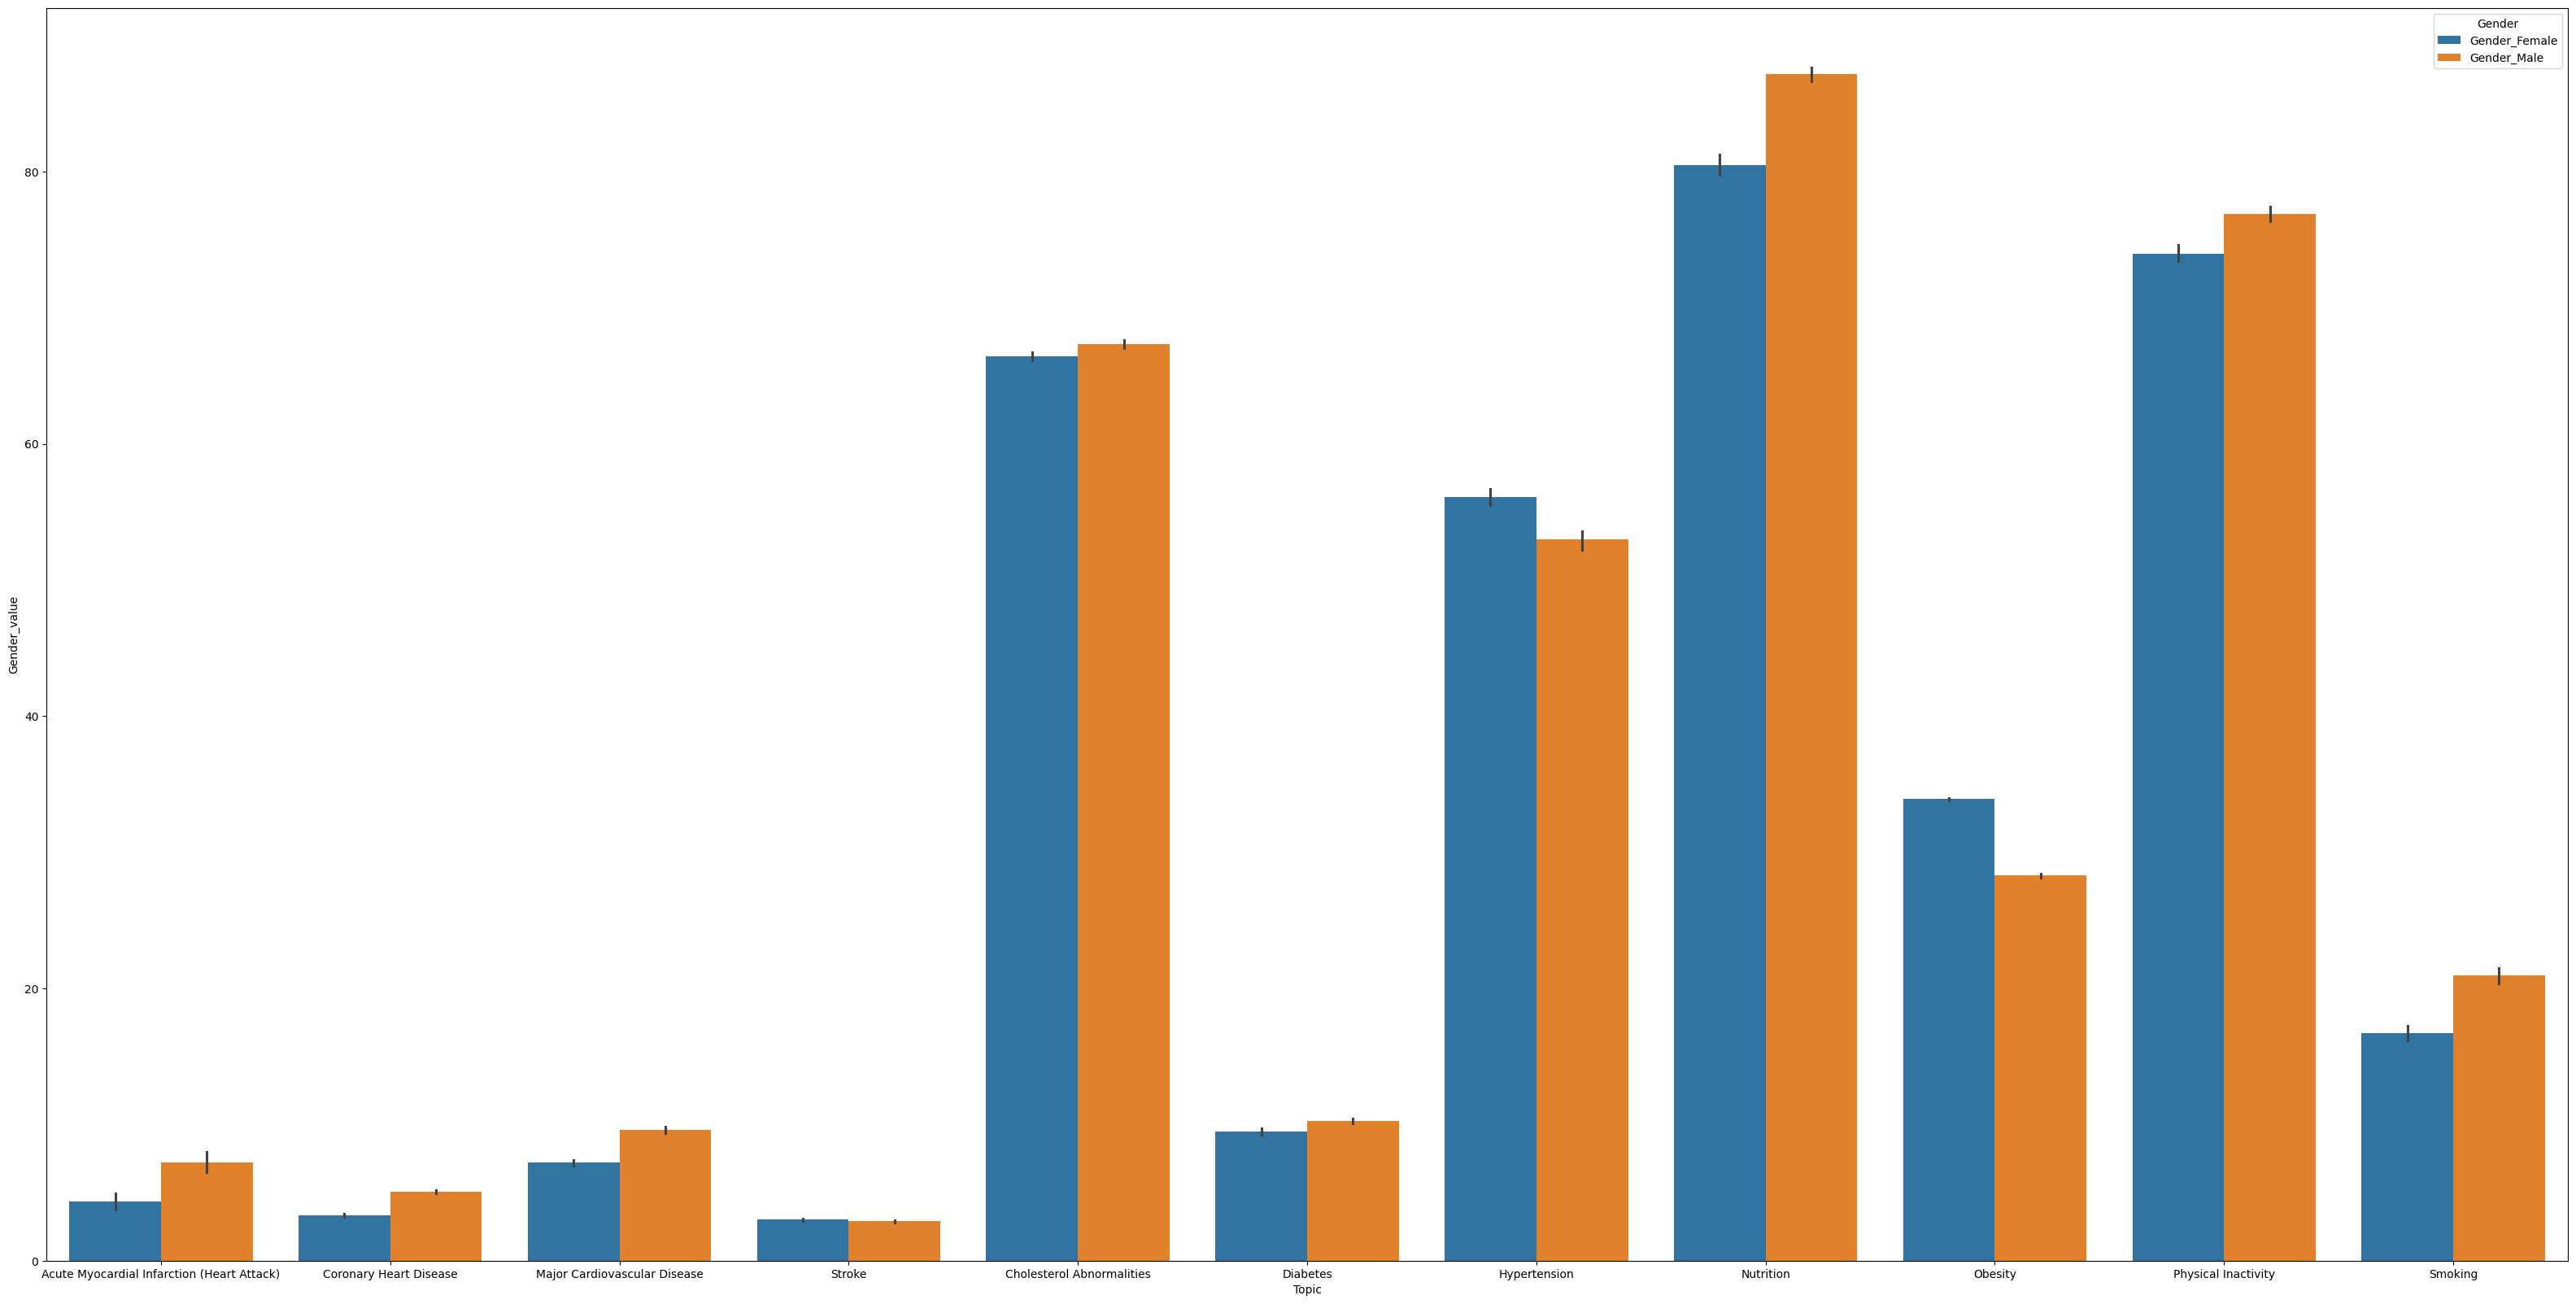

In [27]:
#barplot of crude percentage for each type of disase based on gender.
plt.figure(figsize = (40,20))
melt = merged.melt(id_vars=["Topic"], value_vars=["Gender_Female", "Gender_Male"], var_name="Gender", value_name="Gender_value")
sns.barplot(x = "Topic", y = "Gender_value", data = melt , hue =  "Gender")
plt.show()

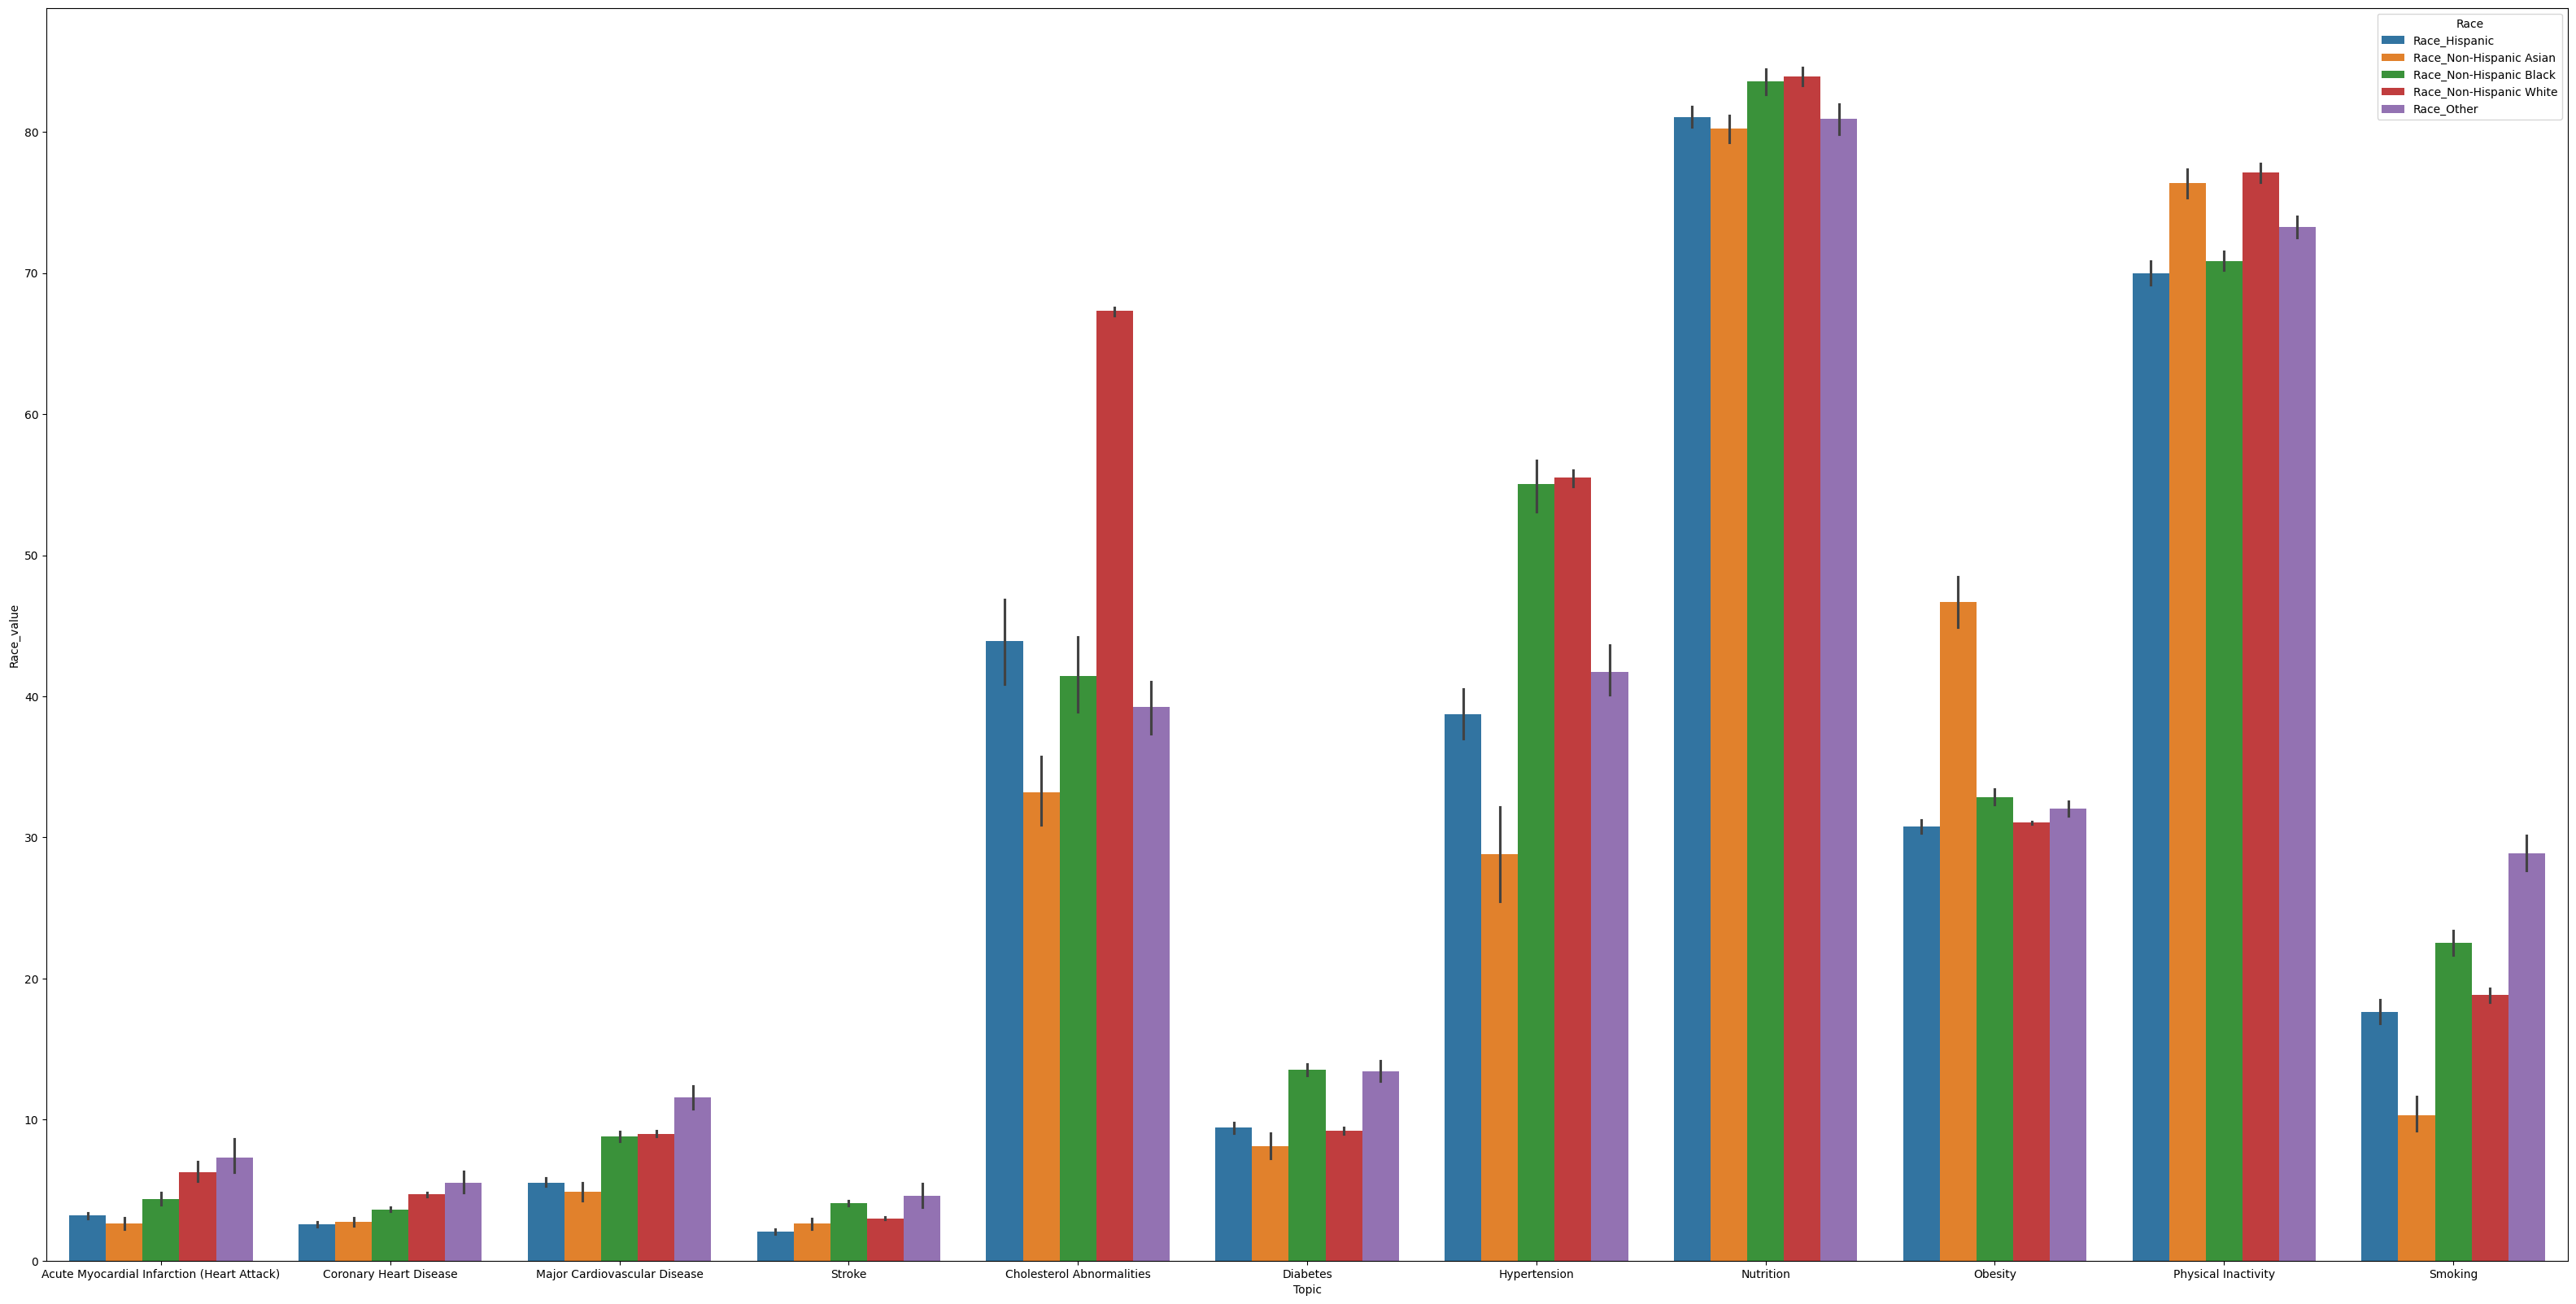

In [26]:
#Crude percentages of disease type sorted by race.
plt.figure(figsize = (40,20))
melt = merged.melt(id_vars=["Topic"], value_vars=["Race_Hispanic", "Race_Non-Hispanic Asian", "Race_Non-Hispanic Black", "Race_Non-Hispanic White", "Race_Other"], var_name="Race", value_name="Race_value")
sns.barplot(x = "Topic", y = "Race_value", data = melt, hue =  "Race")
plt.show()

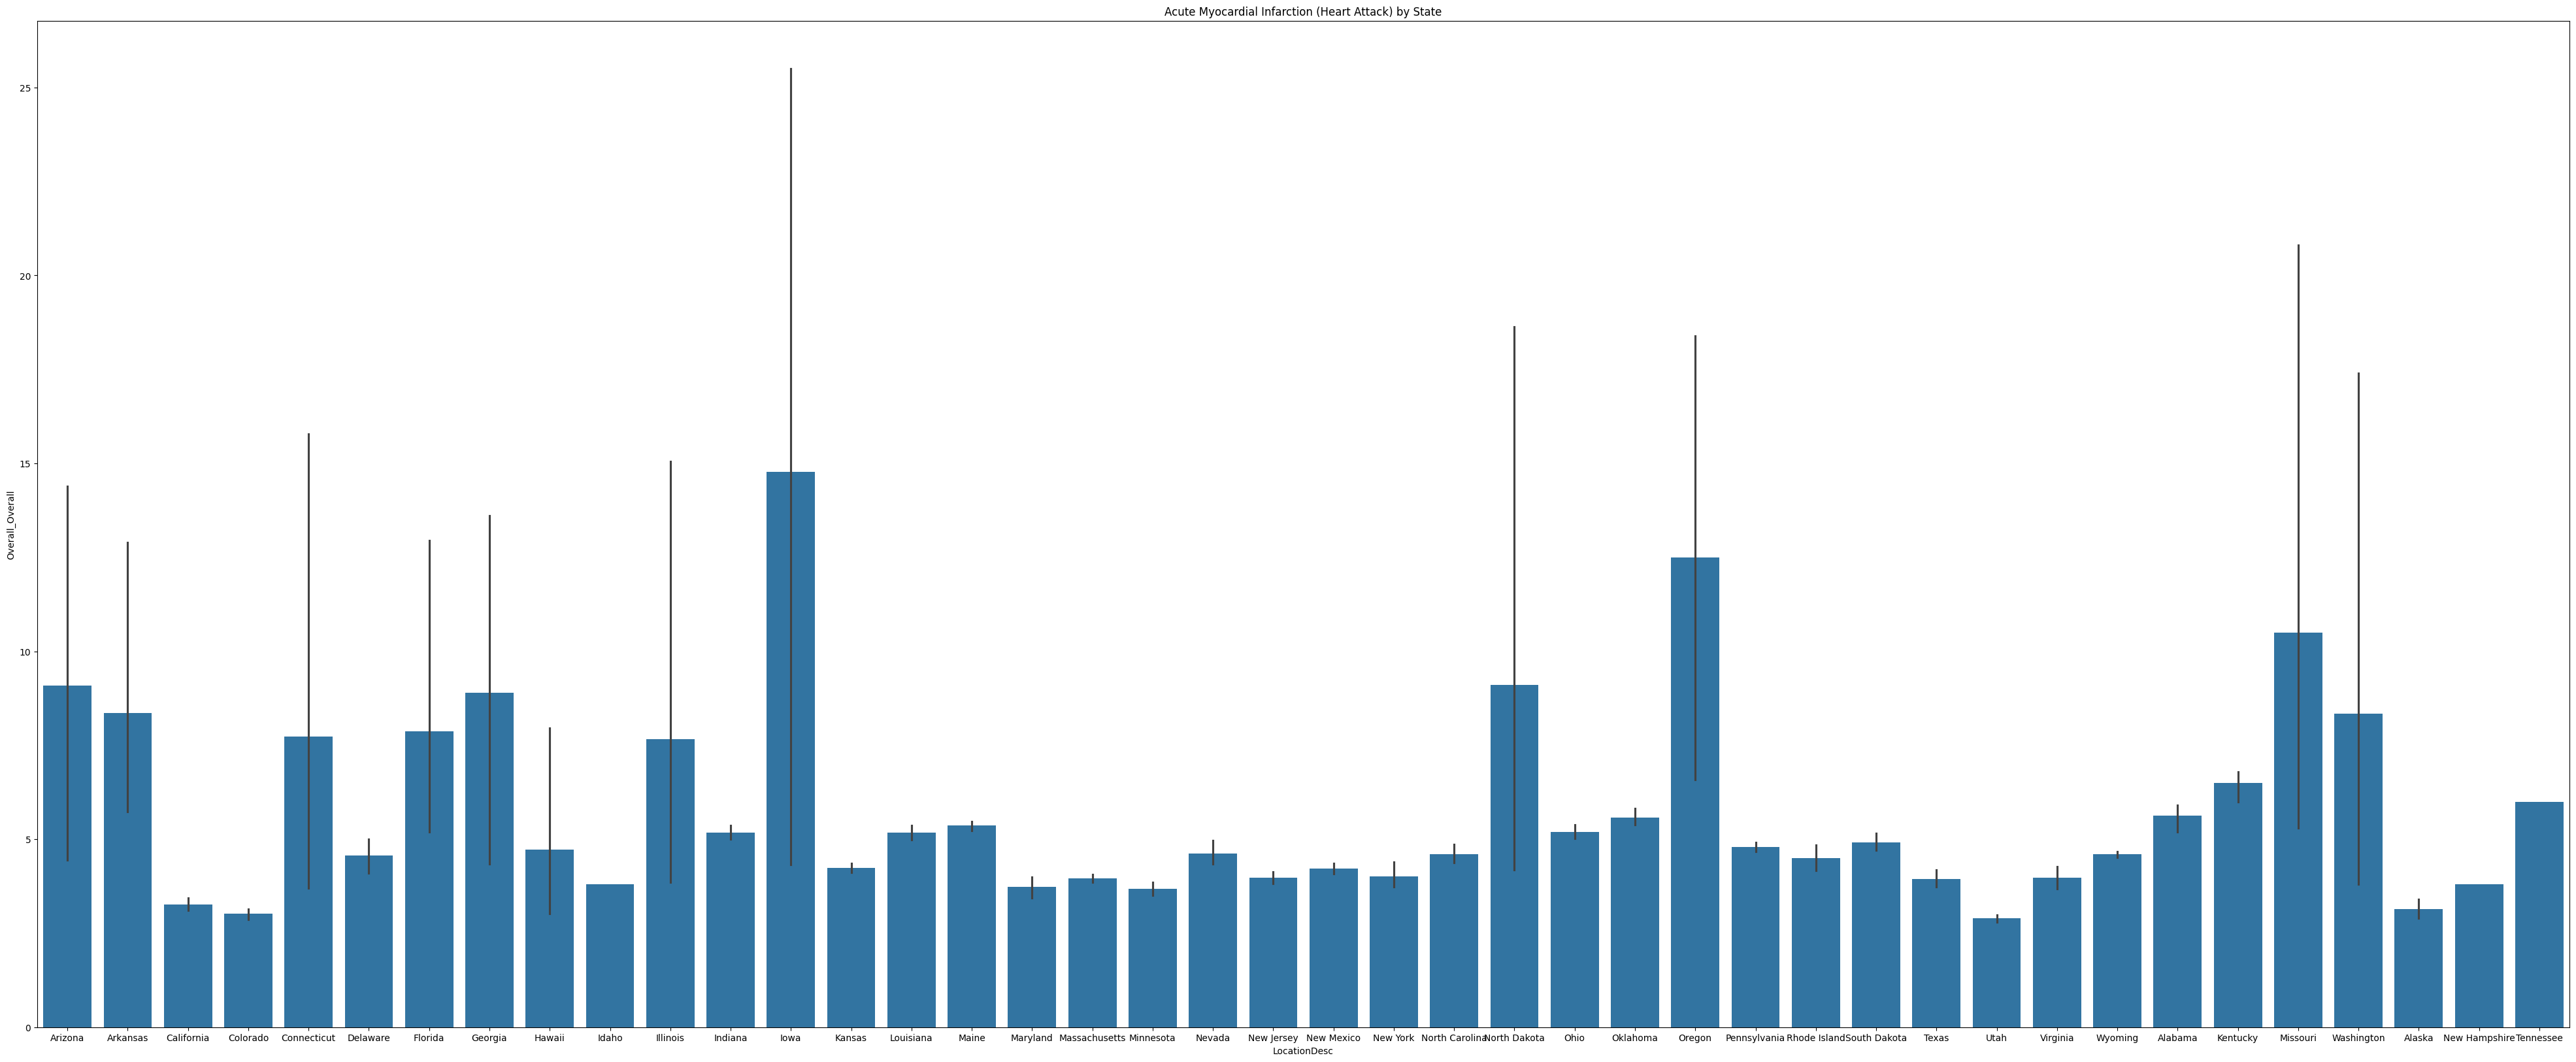

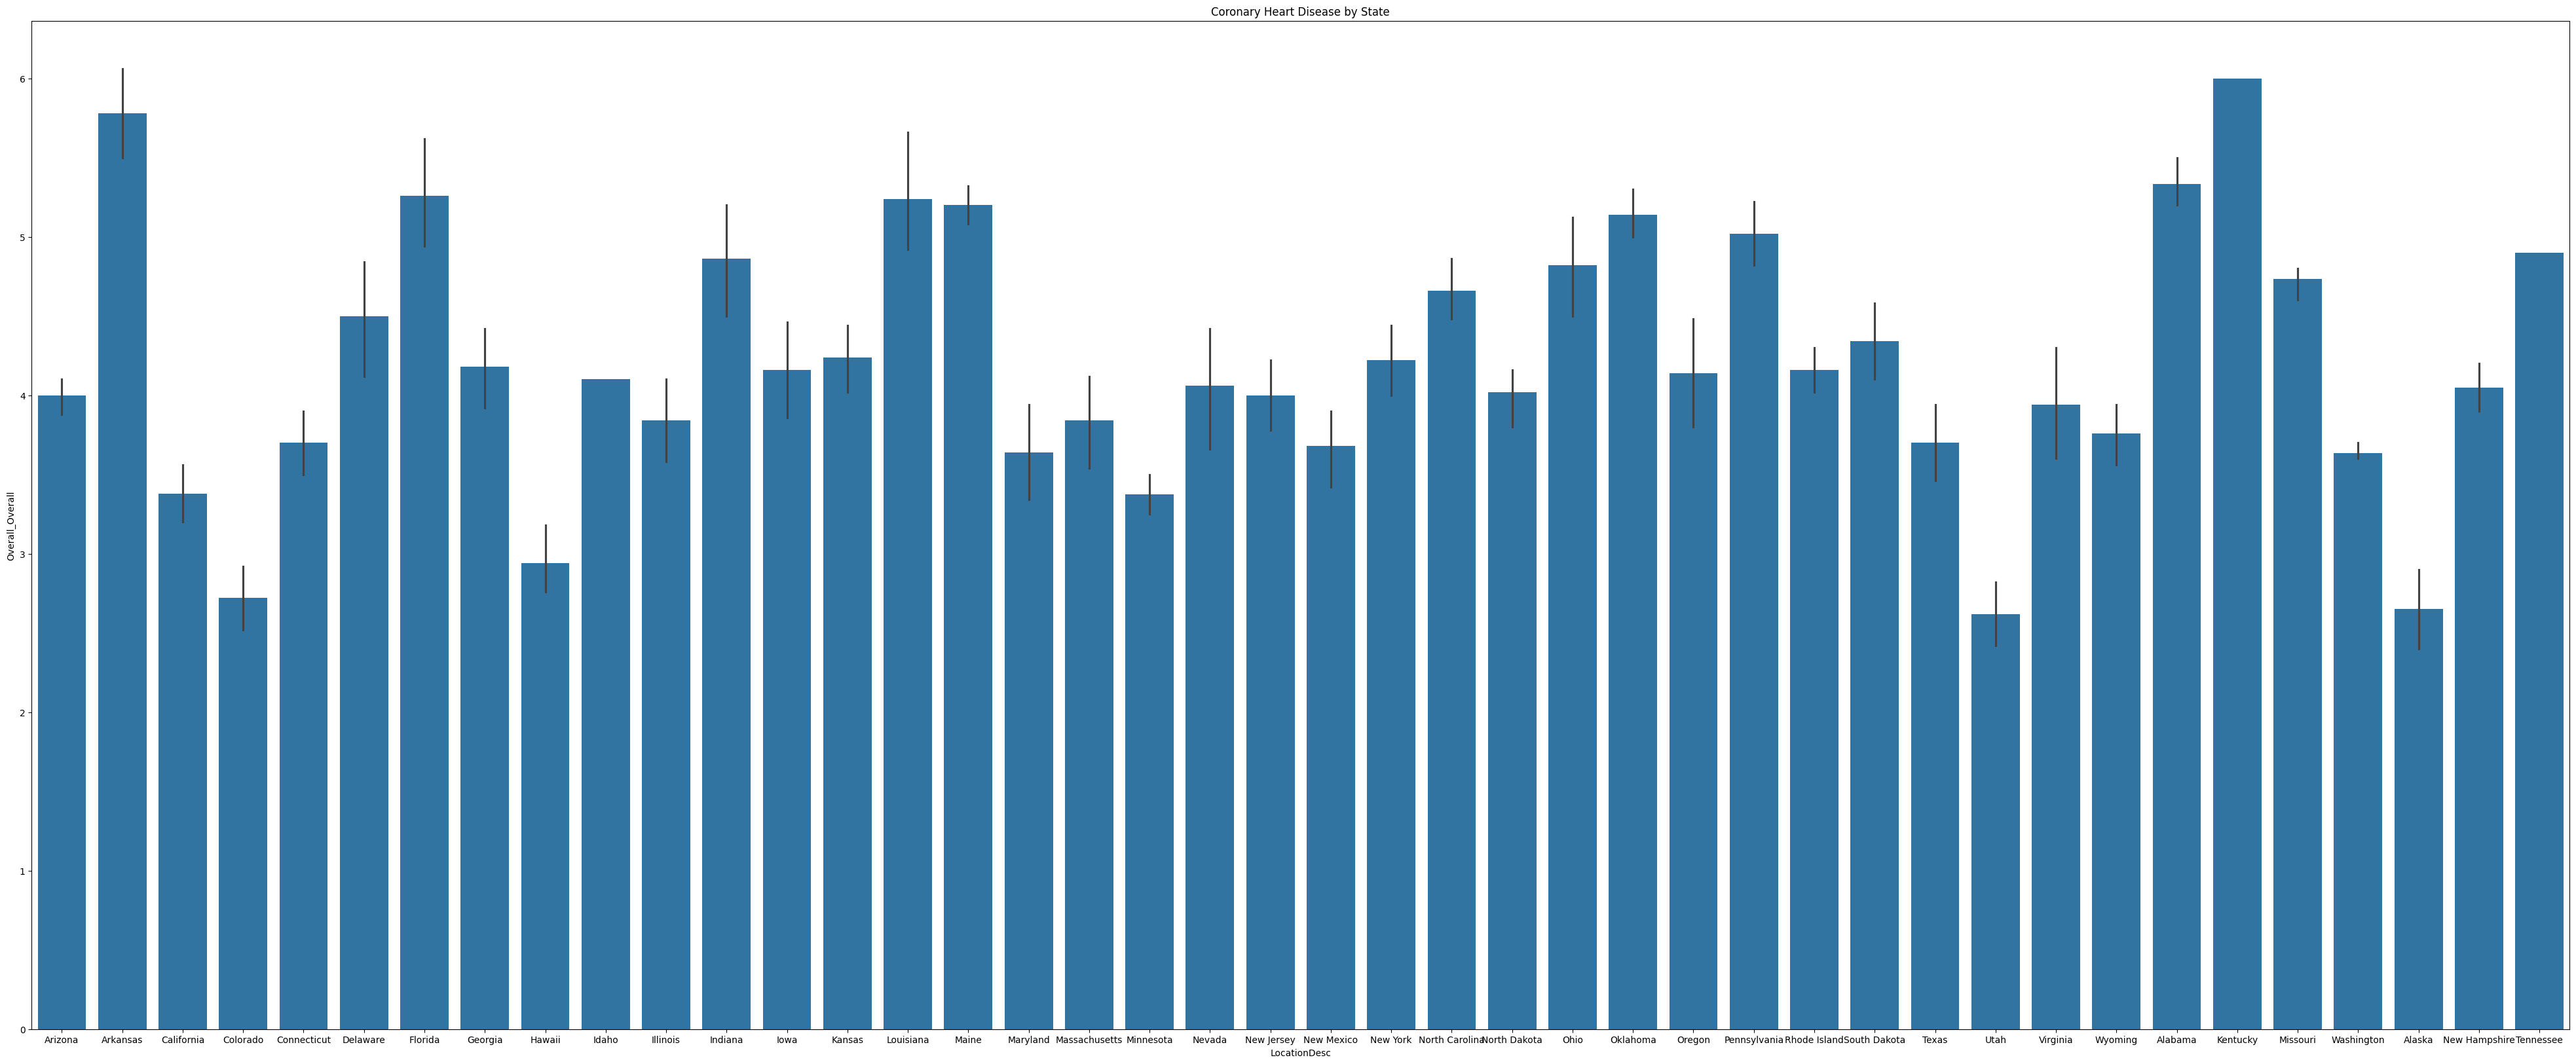

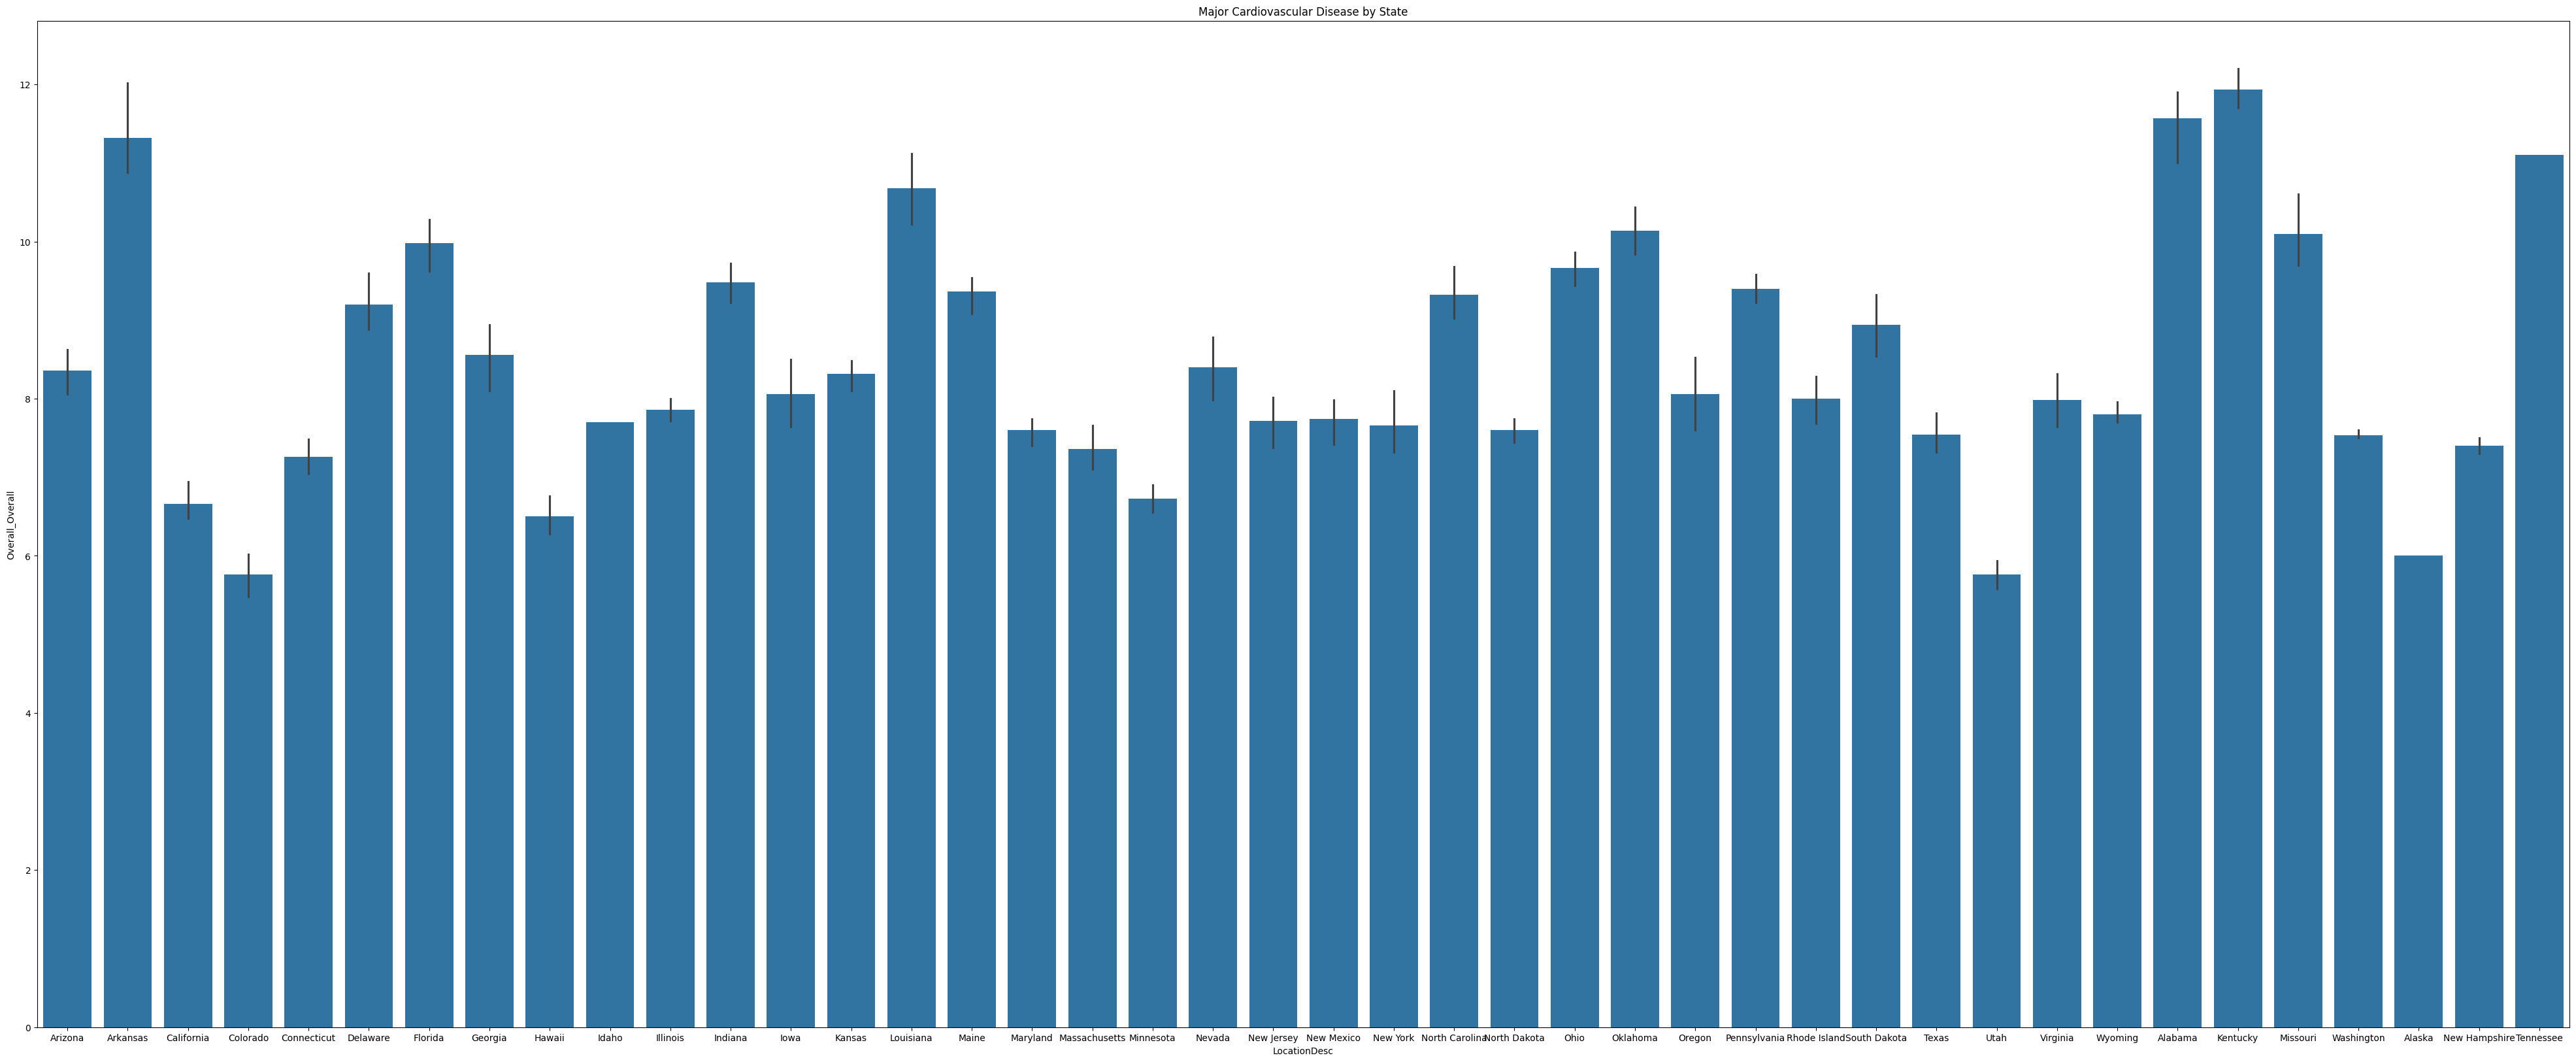

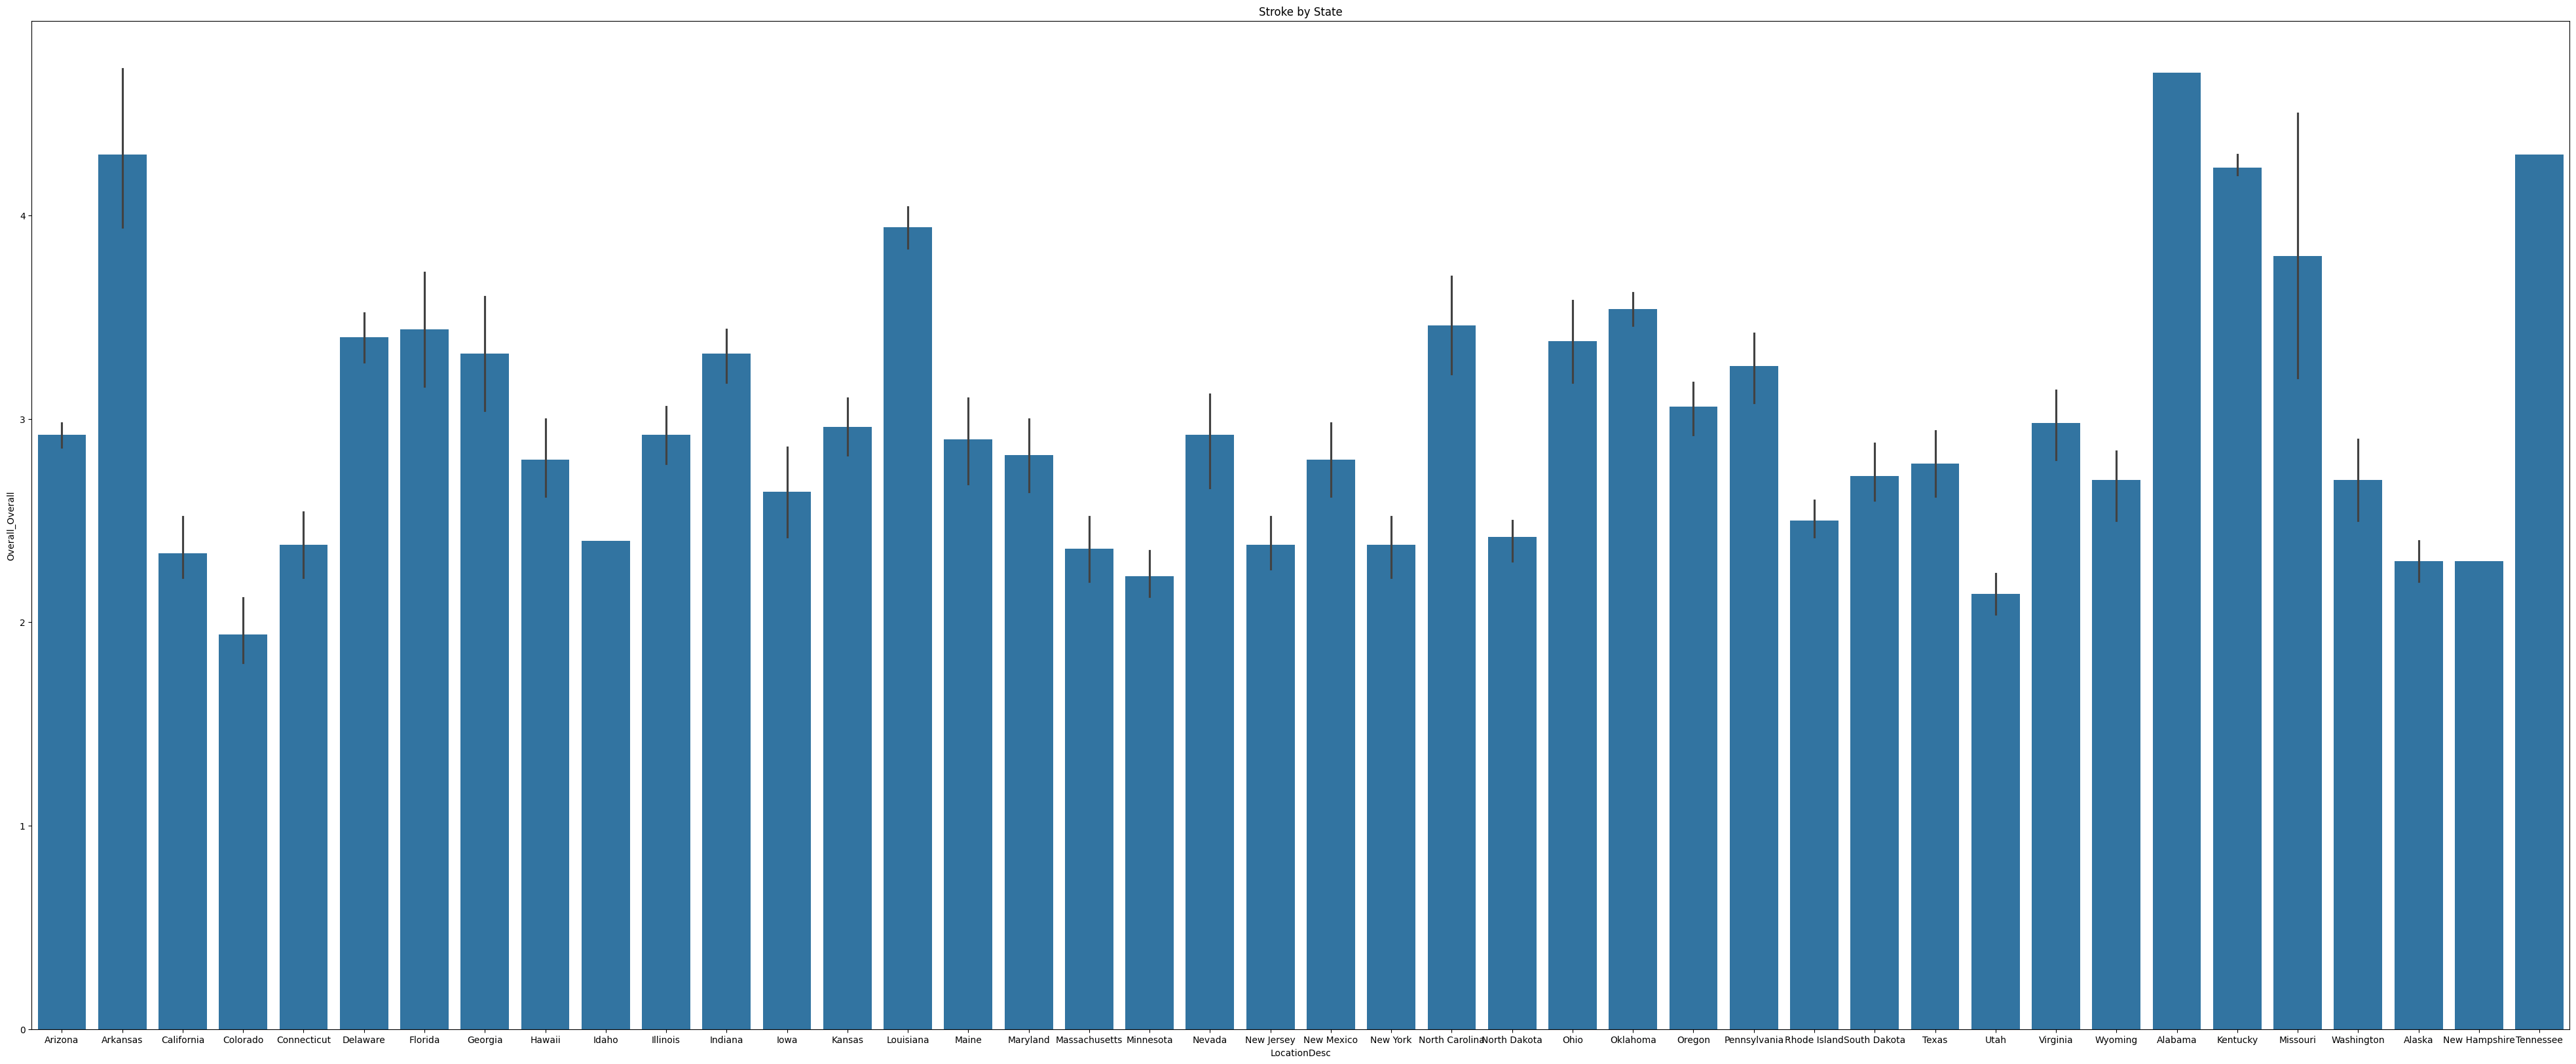

In [30]:
# Cardiovascular Diseases by State

plt.figure(figsize = (50,20))
plt.title("Acute Myocardial Infarction (Heart Attack) by State")
sns.barplot(x = "LocationDesc", y = "Overall_Overall", data = merged[(merged["Topic"] == "Acute Myocardial Infarction (Heart Attack)") & (merged["Overall_Overall"].notna())])
plt.show()
plt.figure(figsize = (50,20))
plt.title("Coronary Heart Disease by State")
sns.barplot(x = "LocationDesc", y = "Overall_Overall", data = merged[(merged["Topic"] == "Coronary Heart Disease") & (merged["Overall_Overall"].notna())])
plt.show()
plt.figure(figsize = (50,20))
plt.title("Major Cardiovascular Disease by State")
sns.barplot(x = "LocationDesc", y = "Overall_Overall", data = merged[(merged["Topic"] == "Major Cardiovascular Disease") & (merged["Overall_Overall"].notna())])
plt.show()
plt.figure(figsize = (50,20))
plt.title("Stroke by State")
sns.barplot(x = "LocationDesc", y = "Overall_Overall", data = merged[(merged["Topic"] == "Stroke") & (merged["Overall_Overall"].notna())])
plt.show()

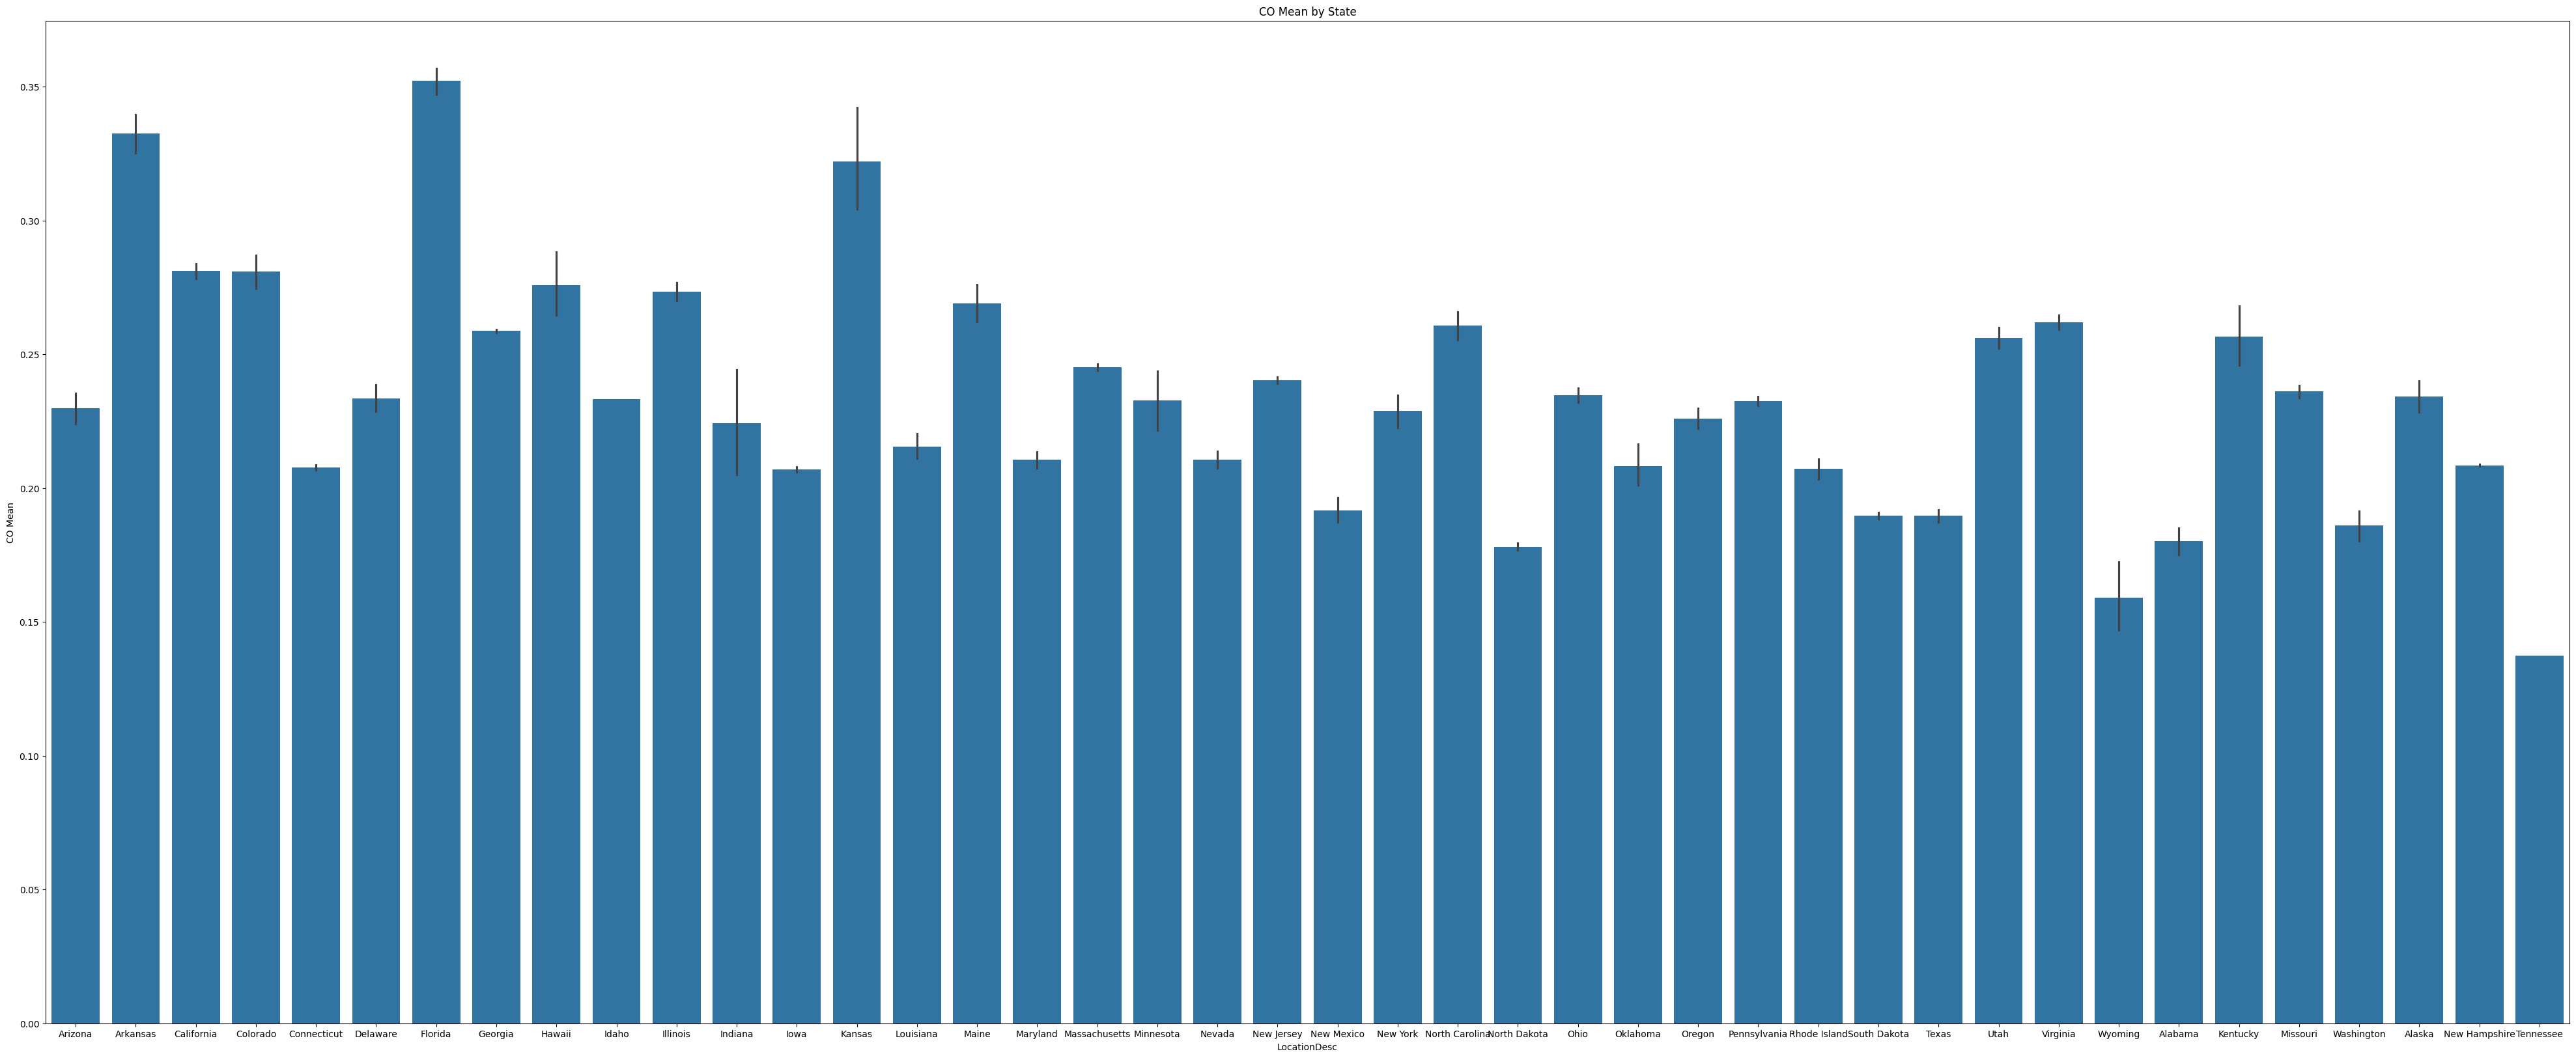

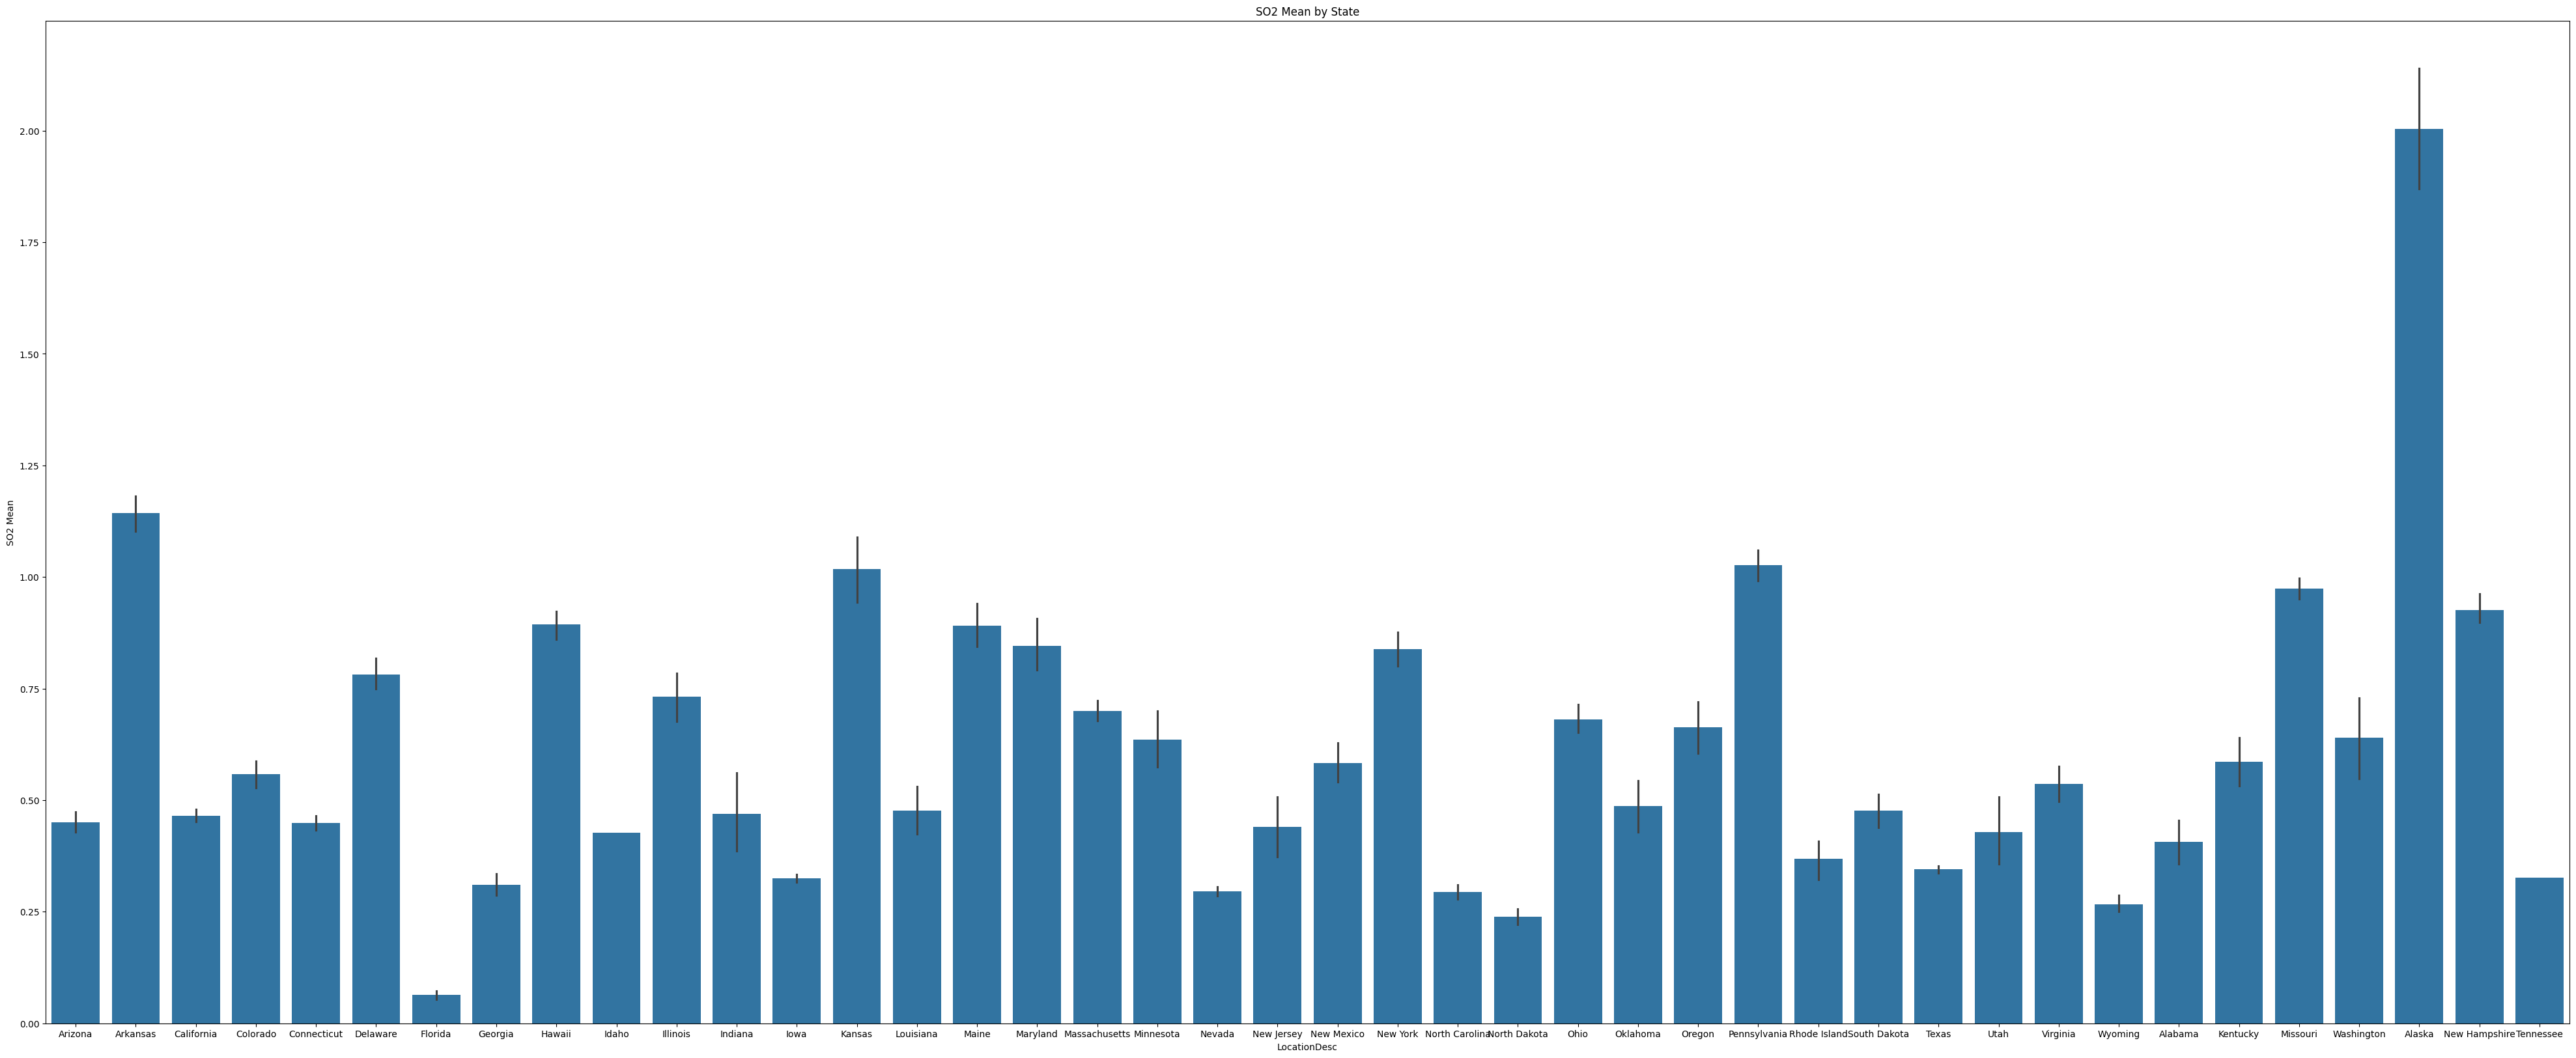

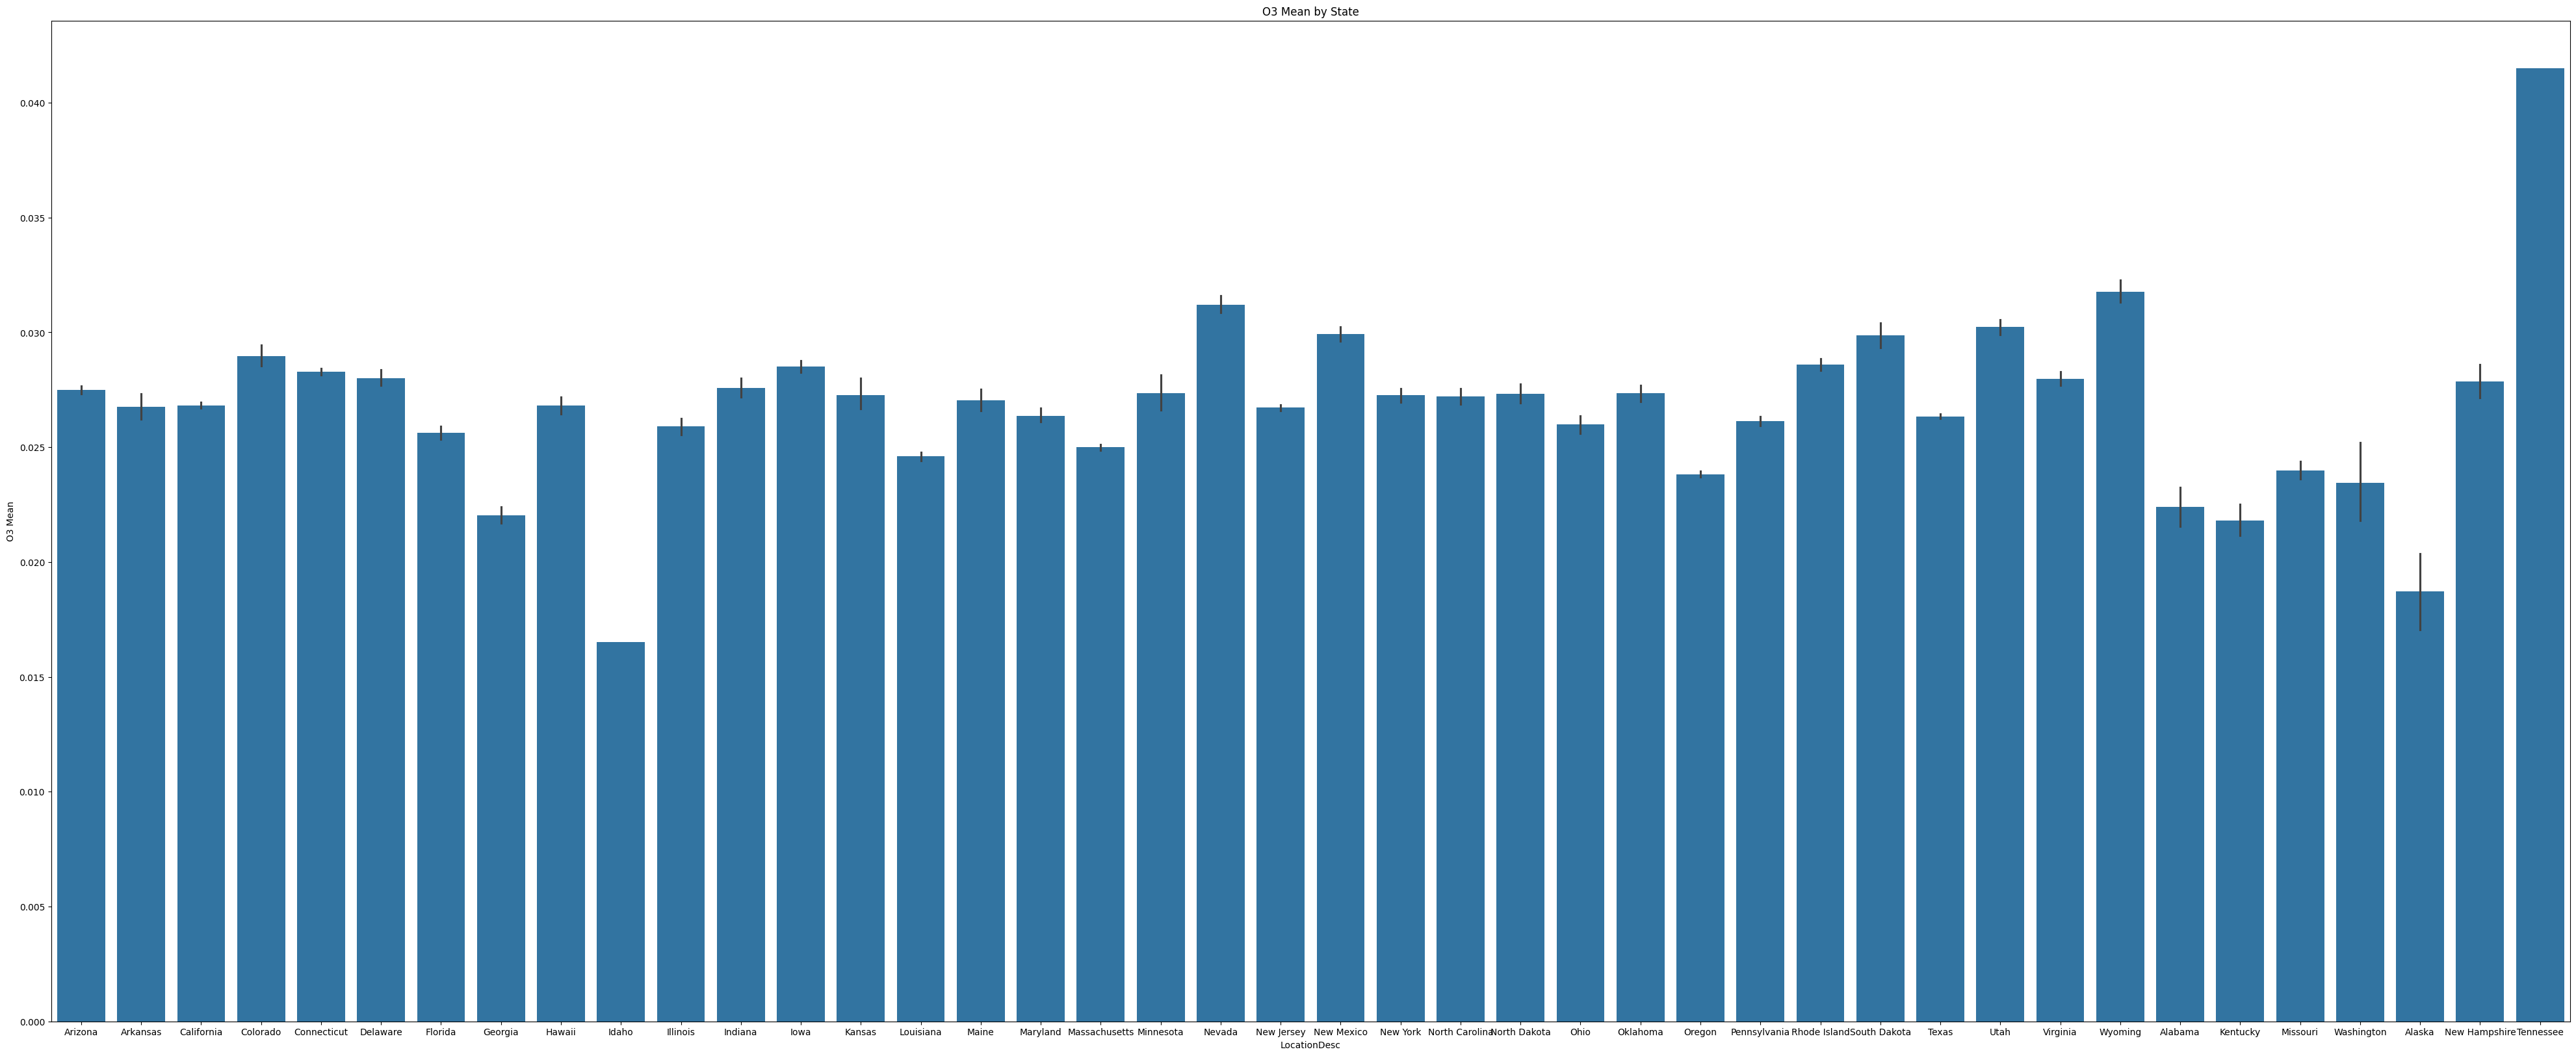

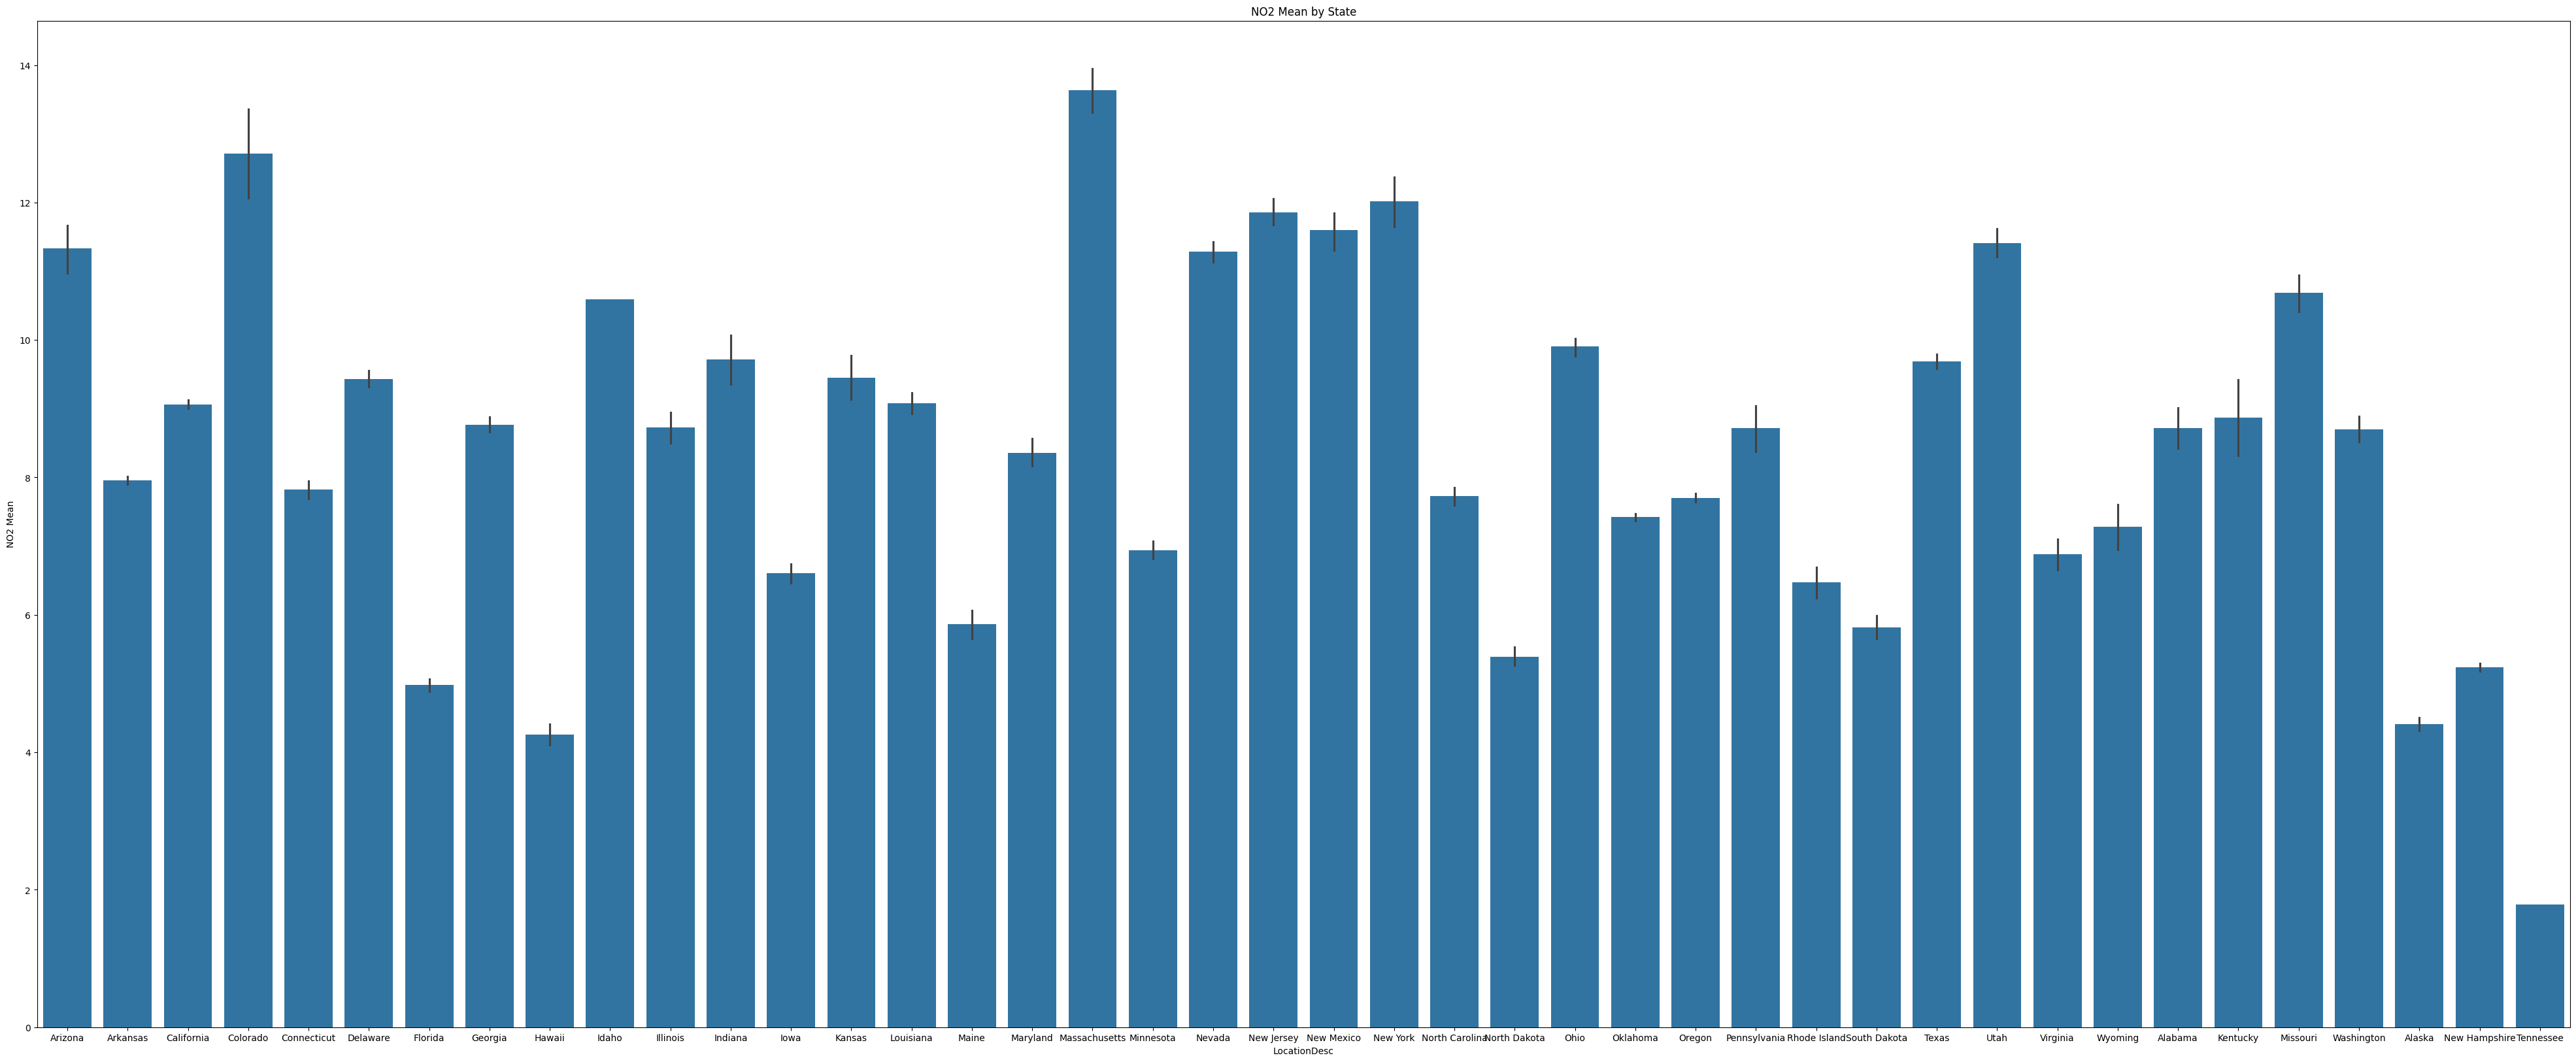

In [32]:
# Pollution Mean by State

plt.figure(figsize = (50,20))
plt.title("CO Mean by State")
sns.barplot(x = "LocationDesc", y = "CO Mean", data = merged)
plt.show()
plt.figure(figsize = (50,20))
plt.title("SO2 Mean by State")
sns.barplot(x = "LocationDesc", y = "SO2 Mean", data = merged)
plt.show()
plt.figure(figsize = (50,20))
plt.title("O3 Mean by State")
sns.barplot(x = "LocationDesc", y = "O3 Mean", data = merged)
plt.show()
plt.figure(figsize = (50,20))
plt.title("NO2 Mean by State")
sns.barplot(x = "LocationDesc", y = "NO2 Mean", data = merged)
plt.show()

In [33]:
merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-33-e6f31489e0a5>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,3.807254e-04
Alaska,-5.484543e-02
Arizona,1.869525e-02
Arkansas,2.060094e-02
California,1.380873e-02
Colorado,-6.121974e-04
Connecticut,-1.634736e-02
Delaware,-1.994304e-02
Florida,1.614282e-03


In [34]:
merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

<ipython-input-34-6feea1a99596>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,2.623959e-02
Alaska,-5.484543e-02
Arizona,-2.752294e-02
Arkansas,4.641882e-03
California,-1.561731e-02
Colorado,1.193224e-02
Connecticut,-3.493398e-02
Delaware,7.707619e-04
Florida,1.332690e-02


In [35]:
merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-35-6cf4b13c7cb2>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,3.468243e-02
Alaska,5.484543e-02
Arizona,4.164523e-02
Arkansas,-5.077136e-03
California,6.108937e-03
Colorado,-2.168581e-02
Connecticut,2.245718e-02
Delaware,6.241645e-03
Florida,1.896036e-02


In [36]:
merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-36-a3d502d9f63b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Coronary Heart Disease"))


,0
LocationDesc,
Alabama,-2.439929e-02
Alaska,-5.484543e-02
Arizona,1.009110e-02
Arkansas,-1.981322e-02
California,-7.365605e-05
Colorado,2.157218e-02
Connecticut,-4.202388e-02
Delaware,1.737289e-02
Florida,2.021195e-02


In [37]:
merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-37-7ca020f1c6bd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,3.807254e-04
Alaska,-5.484543e-02
Arizona,1.869525e-02
Arkansas,2.060094e-02
California,1.380873e-02
Colorado,-6.121974e-04
Connecticut,-1.634736e-02
Delaware,-1.994304e-02
Florida,1.614282e-03


In [38]:
merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-38-4a5c726db4ba>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,3.468243e-02
Alaska,5.484543e-02
Arizona,4.164523e-02
Arkansas,-5.077136e-03
California,6.108937e-03
Colorado,-2.168581e-02
Connecticut,2.245718e-02
Delaware,6.241645e-03
Florida,1.896036e-02


In [39]:
merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-39-2966e8bdf1e1>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,-2.439929e-02
Alaska,-5.484543e-02
Arizona,1.009110e-02
Arkansas,-1.981322e-02
California,-7.365605e-05
Colorado,2.157218e-02
Connecticut,-4.202388e-02
Delaware,1.737289e-02
Florida,2.021195e-02


In [40]:
merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))

<ipython-input-40-248d9560cf2e>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Major Cardiovascular Disease"))


,0
LocationDesc,
Alabama,2.623959e-02
Alaska,-5.484543e-02
Arizona,-2.752294e-02
Arkansas,4.641882e-03
California,-1.561731e-02
Colorado,1.193224e-02
Connecticut,-3.493398e-02
Delaware,7.707619e-04
Florida,1.332690e-02


In [41]:
merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Stroke"))

<ipython-input-41-1b4d2169b236>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,2.623959e-02
Alaska,-5.484543e-02
Arizona,-2.752294e-02
Arkansas,4.641882e-03
California,-1.561731e-02
Colorado,1.193224e-02
Connecticut,-3.493398e-02
Delaware,7.707619e-04
Florida,1.332690e-02


In [42]:
merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Stroke"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-42-51a7439247f6>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,-2.439929e-02
Alaska,-5.484543e-02
Arizona,1.009110e-02
Arkansas,-1.981322e-02
California,-7.365605e-05
Colorado,2.157218e-02
Connecticut,-4.202388e-02
Delaware,1.737289e-02
Florida,2.021195e-02


In [43]:
merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Stroke"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-43-170b9dd594e0>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,3.807254e-04
Alaska,-5.484543e-02
Arizona,1.869525e-02
Arkansas,2.060094e-02
California,1.380873e-02
Colorado,-6.121974e-04
Connecticut,-1.634736e-02
Delaware,-1.994304e-02
Florida,1.614282e-03


In [44]:
merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Stroke"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-44-ed45099f66ec>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Stroke"))


,0
LocationDesc,
Alabama,3.468243e-02
Alaska,5.484543e-02
Arizona,4.164523e-02
Arkansas,-5.077136e-03
California,6.108937e-03
Colorado,-2.168581e-02
Connecticut,2.245718e-02
Delaware,6.241645e-03
Florida,1.896036e-02


In [45]:
merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-45-9d70ca7f2faa>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['NO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,-2.439929e-02
Alaska,-5.484543e-02
Arizona,1.009110e-02
Arkansas,-1.981322e-02
California,-7.365605e-05
Colorado,2.157218e-02
Connecticut,-4.202388e-02
Delaware,1.737289e-02
Florida,2.021195e-02


In [46]:
merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

<ipython-input-46-2a34e31ec23f>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['O3 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,2.623959e-02
Alaska,-5.484543e-02
Arizona,-2.752294e-02
Arkansas,4.641882e-03
California,-1.561731e-02
Colorado,1.193224e-02
Connecticut,-3.493398e-02
Delaware,7.707619e-04
Florida,1.332690e-02


In [47]:
merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-47-ccd05eb7dd2b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['CO Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,3.807254e-04
Alaska,-5.484543e-02
Arizona,1.869525e-02
Arkansas,2.060094e-02
California,1.380873e-02
Colorado,-6.121974e-04
Connecticut,-1.634736e-02
Delaware,-1.994304e-02
Florida,1.614282e-03


In [48]:
merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-48-845aa749c861>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  merged.groupby('LocationDesc').apply(lambda x: x['SO2 Mean'].corr(x["Topic"] == "Acute Myocardial Infarction (Heart Attack)"))


,0
LocationDesc,
Alabama,3.468243e-02
Alaska,5.484543e-02
Arizona,4.164523e-02
Arkansas,-5.077136e-03
California,6.108937e-03
Colorado,-2.168581e-02
Connecticut,2.245718e-02
Delaware,6.241645e-03
Florida,1.896036e-02
